In [1]:
# importing libraries fo this drylab 
import os
import pandas as pd
import numpy as np 
import seaborn as sns
from itertools import combinations
from matplotlib import pyplot as plt 
from scipy import stats # for regression 
from scipy.optimize import curve_fit
# note that here we import modules from scipy multiple times instead of just importing scipy once. Both options are ok
%matplotlib inline

In [2]:
# let's first get our workign directory to be the folder at which your repository is (Vesicle Patching)

# os.chdir("../") # moves one folder back. 
path = "/Users/ramonrodriguez/Desktop/Stanford/Year_Two/Tang_Lab/Vesicle_Patching"
os.chdir(path)# you can also change to an absolute path 
print(os.getcwd())
# let's now import our datasets
ablation_intensity = pd.read_csv(f"/Users/ramonrodriguez/Desktop/Stanford/Year_Two/Tang_Lab/Vesicle_Patching/Full-Data_Laser_Ablation/Full_Data_Laser_Ablation_Analysis.csv")

display(ablation_intensity)

/Users/ramonrodriguez/Desktop/Stanford/Year_Two/Tang_Lab/Vesicle_Patching


Time  Z-stack  Microns  Intensity  Cell
0        1        0  0.00000    557.594     1
1        1        1  2.49800    788.733     1
2        1        2  4.99590    785.602     1
3        1        3  7.49390    751.869     1
4        1        4  9.99180    829.713     1
...    ...      ...      ...        ...   ...
1056    24        3  7.49389    368.098     8
1057    25        0  0.00000    587.381     8
1058    25        1  2.49796    630.189     8
1059    25        2  4.99592    424.410     8
1060    25        3  7.49389    318.067     8

[1061 rows x 5 columns]

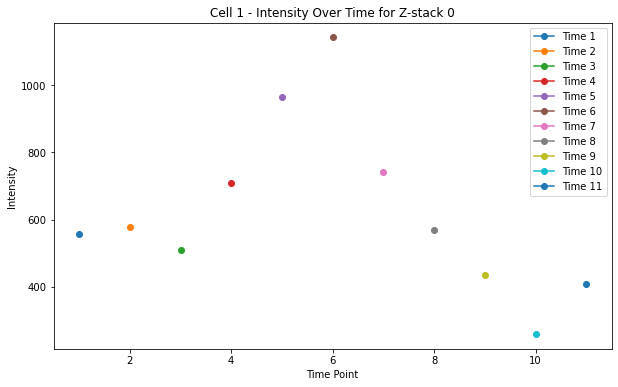

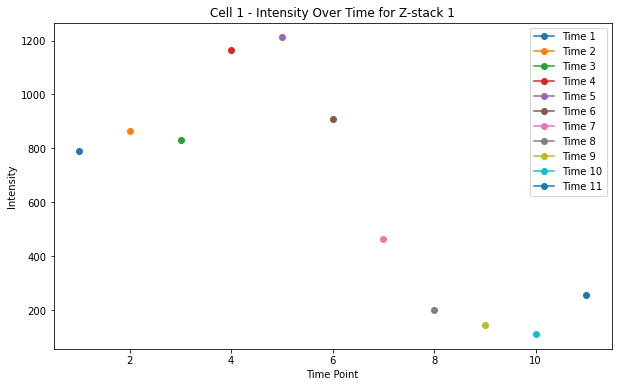

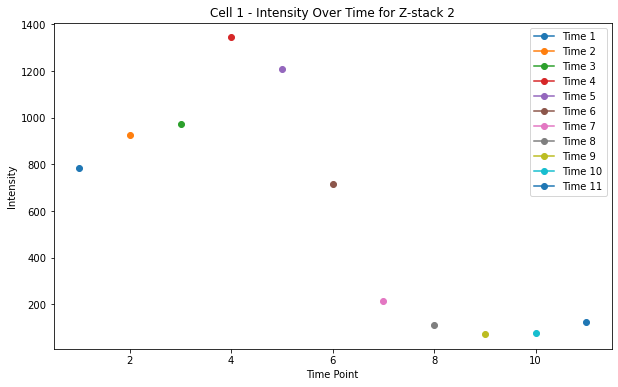

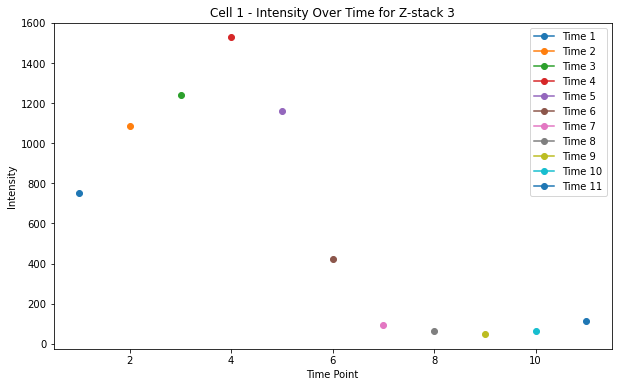

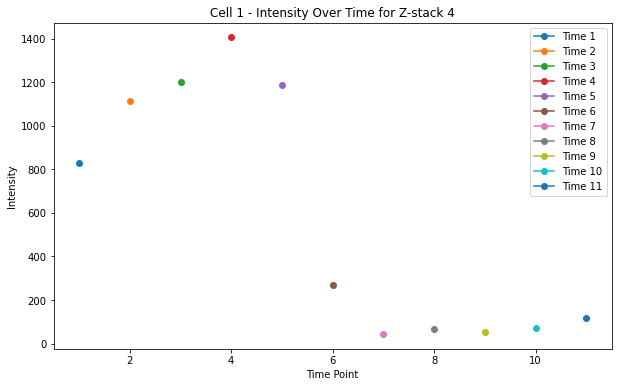

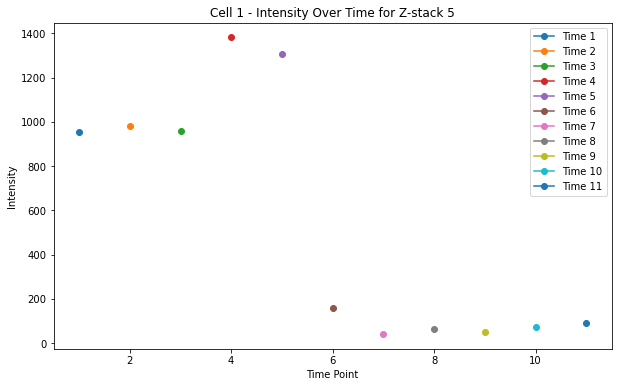

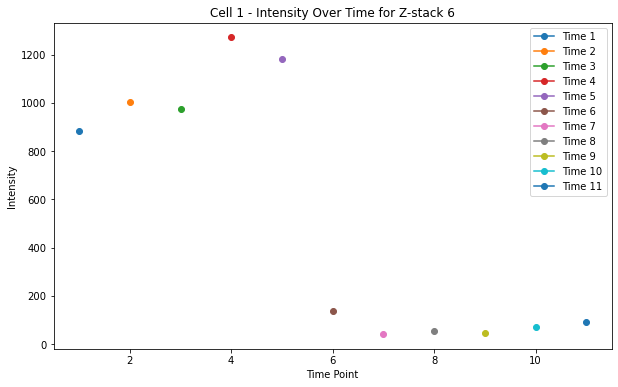

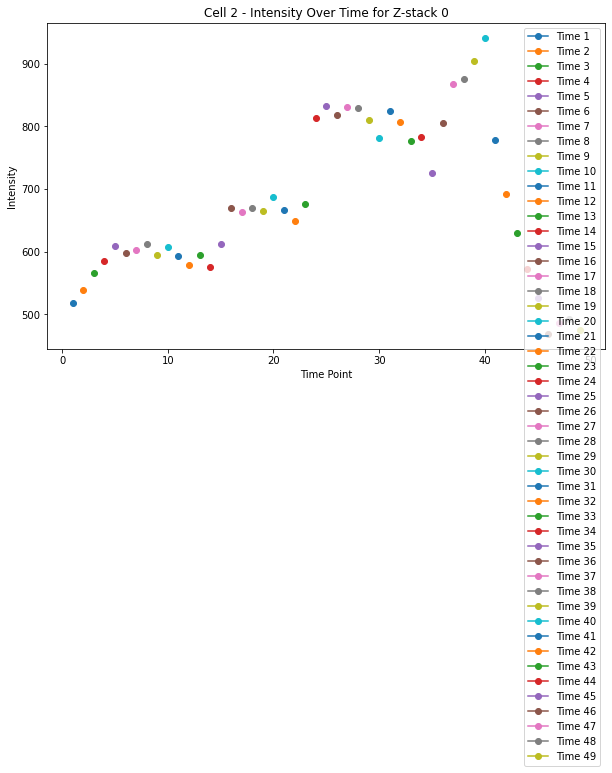

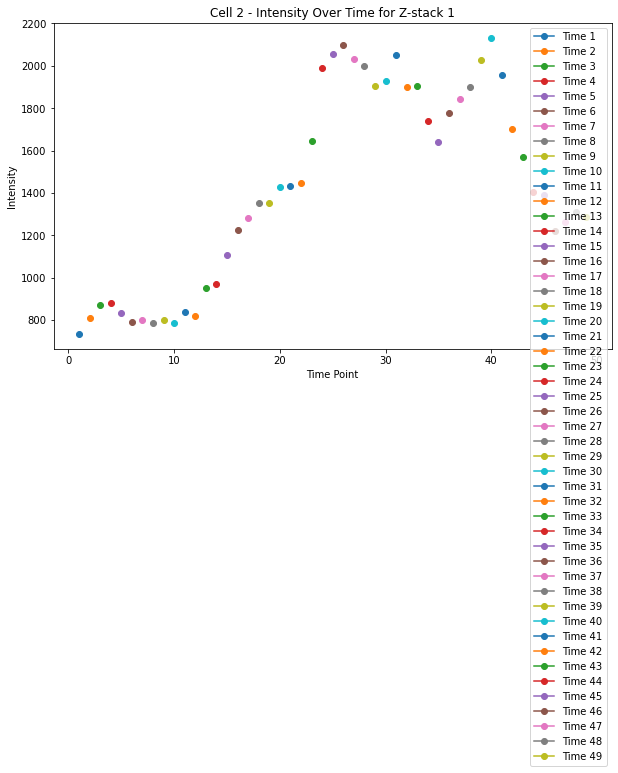

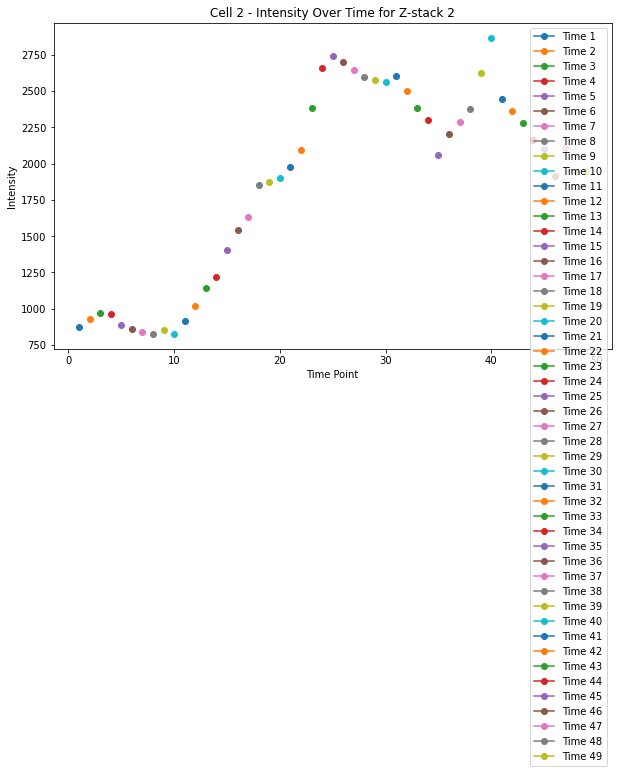

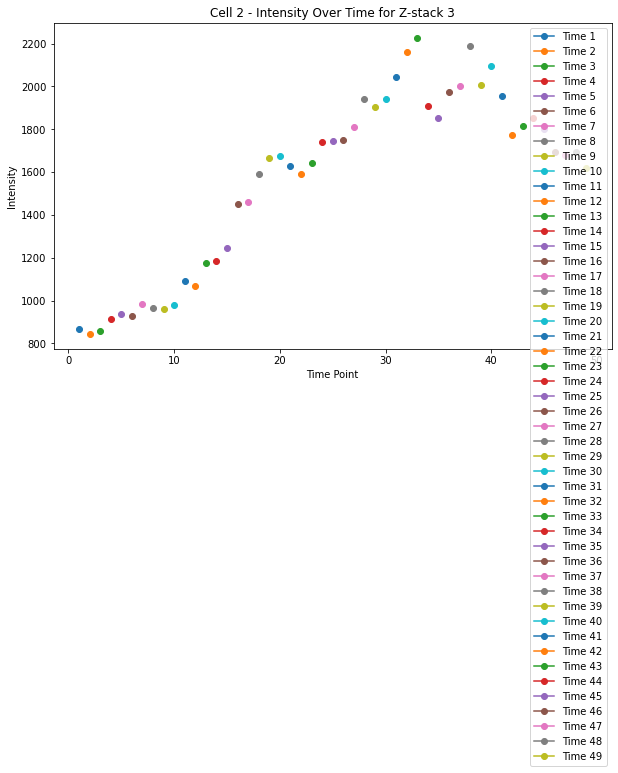

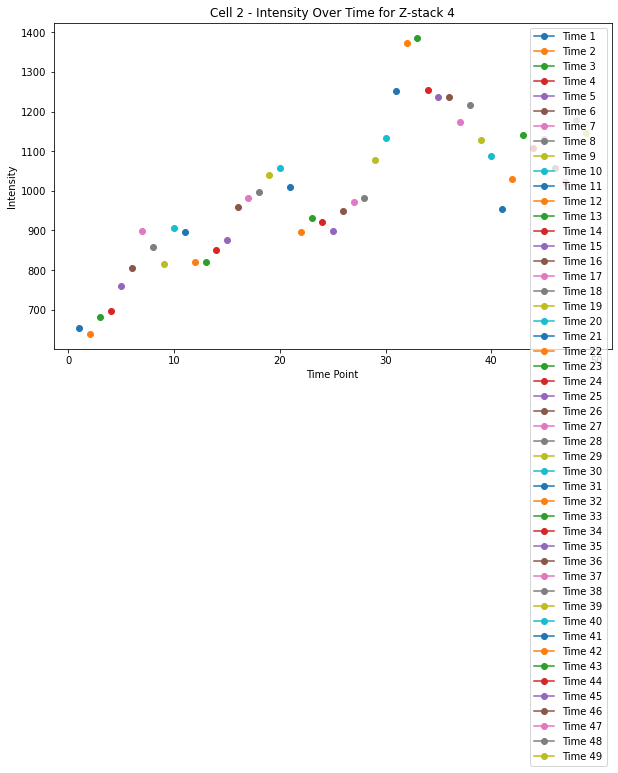

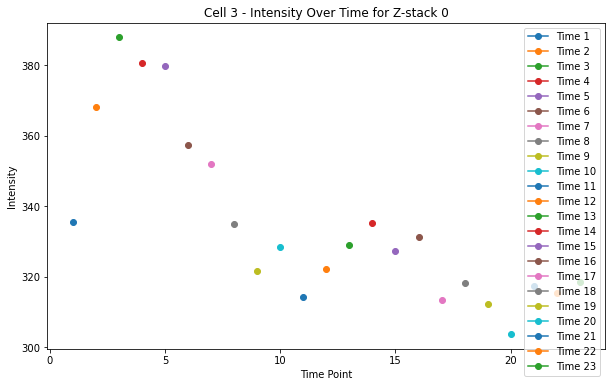

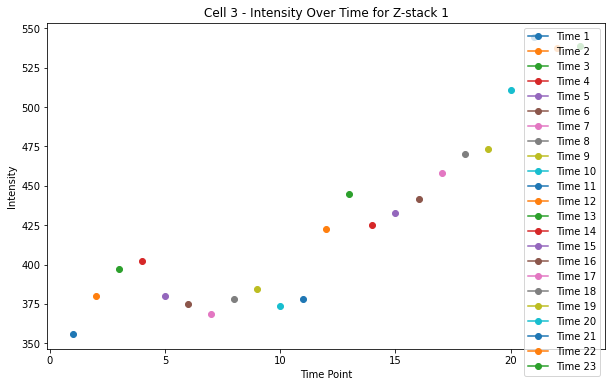

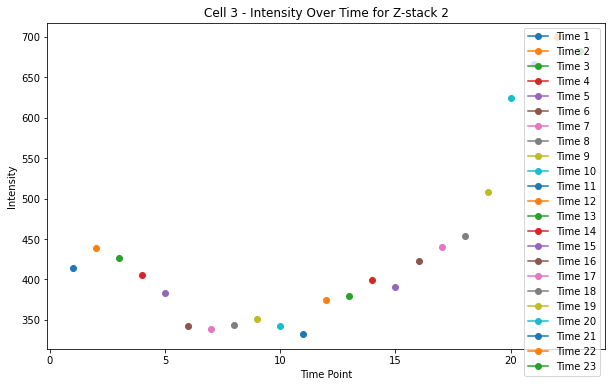

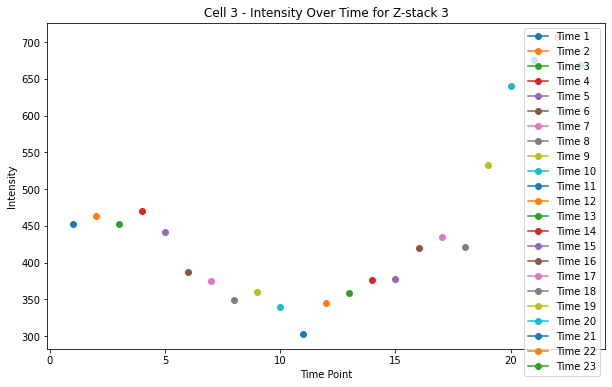

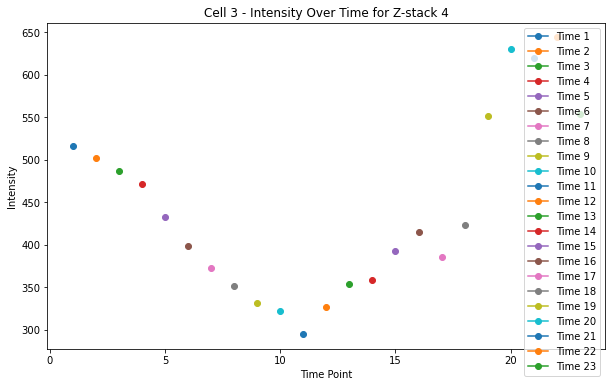

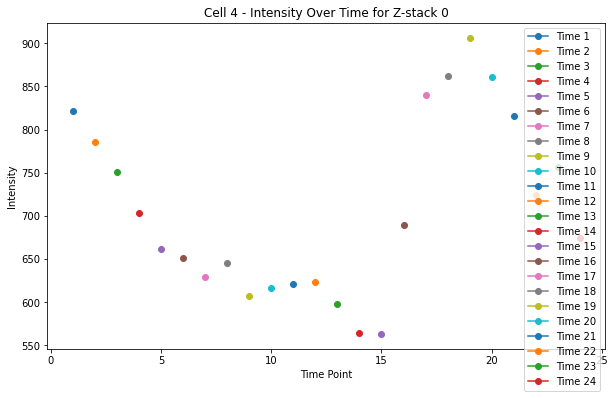

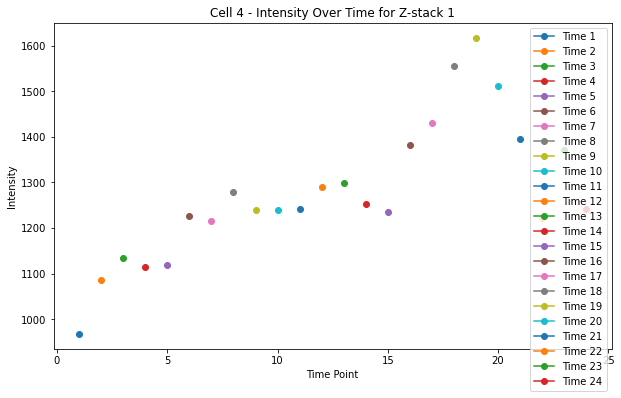

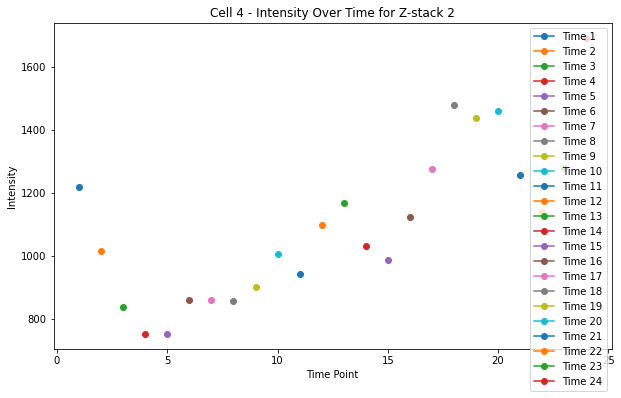

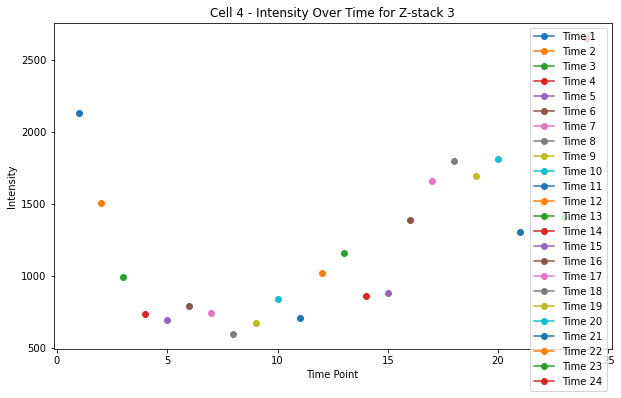

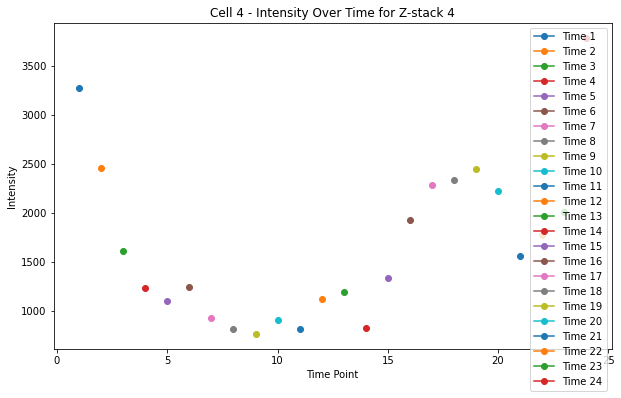

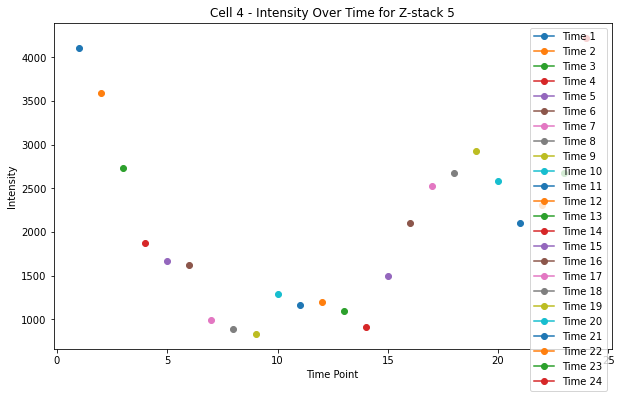

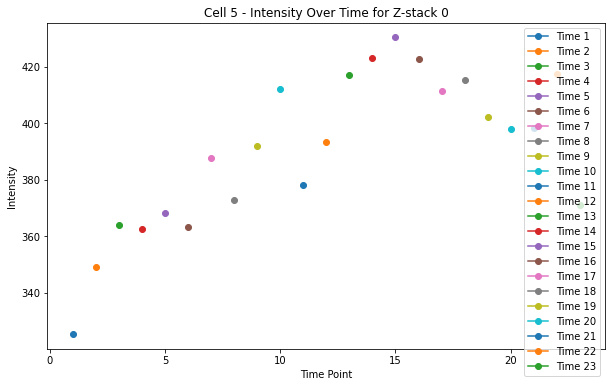

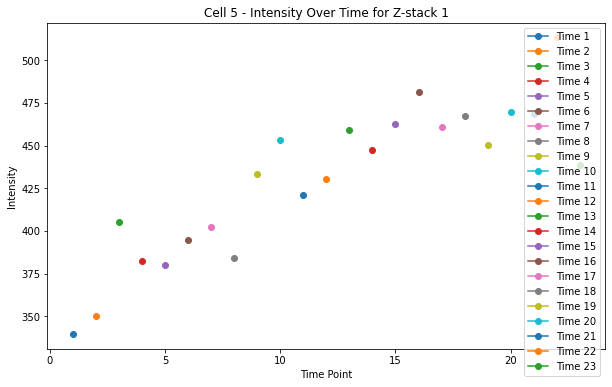

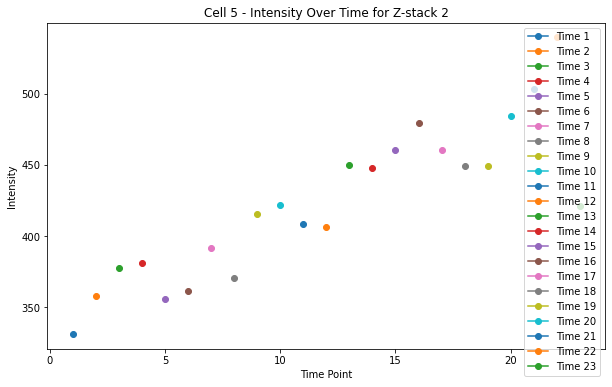

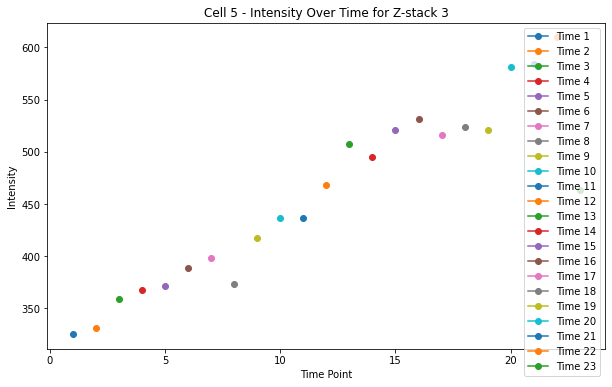

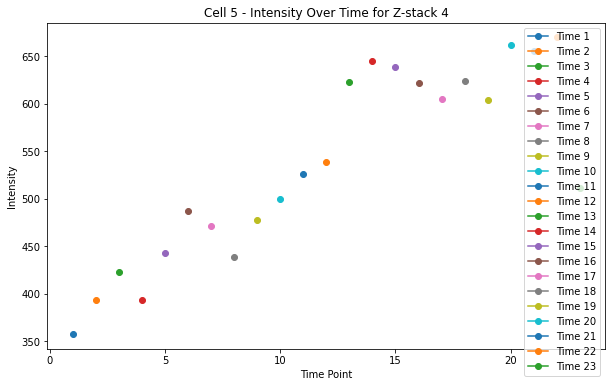

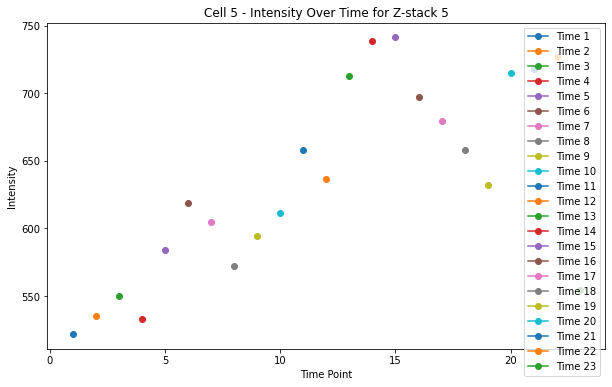

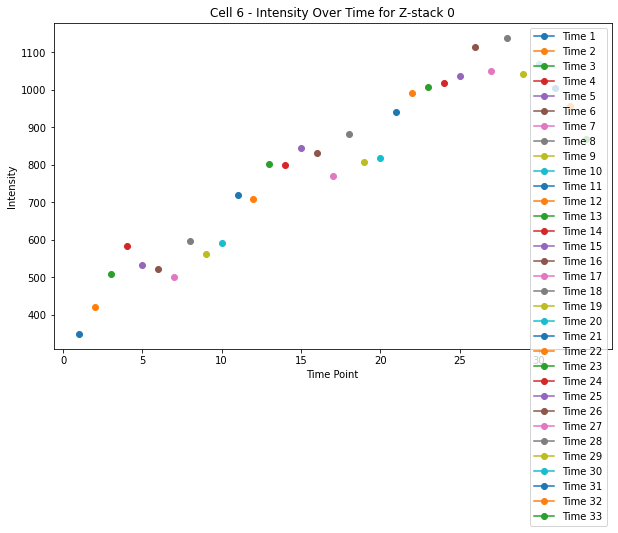

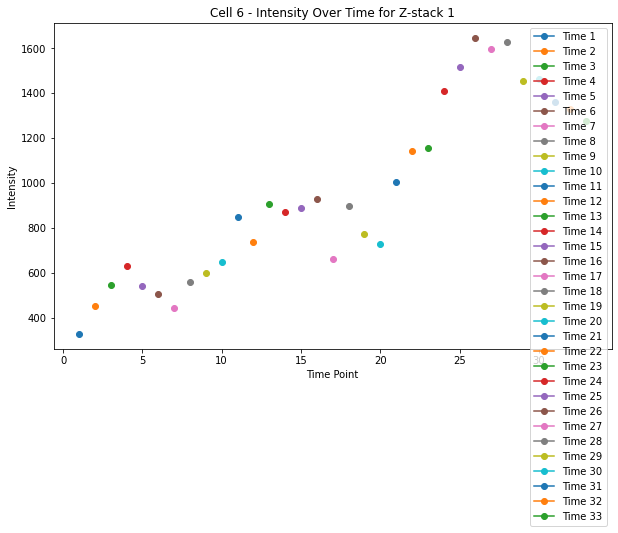

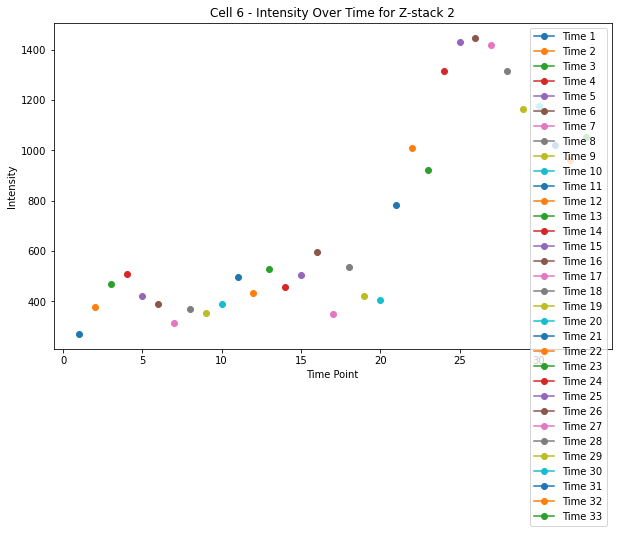

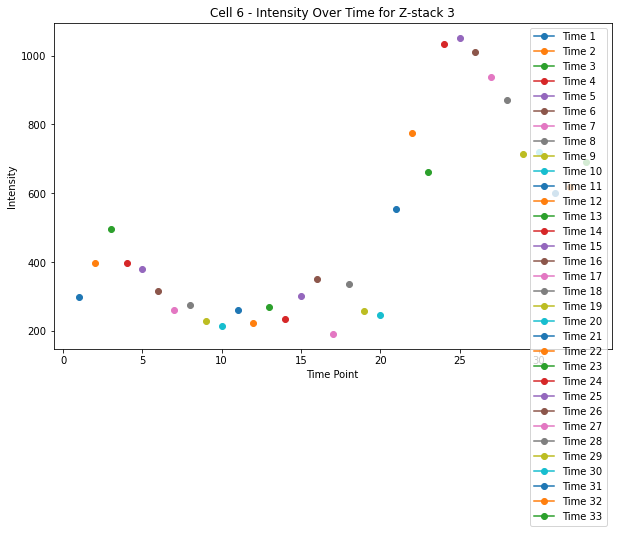

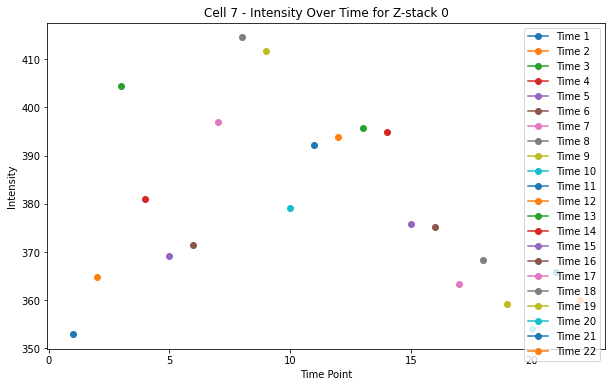

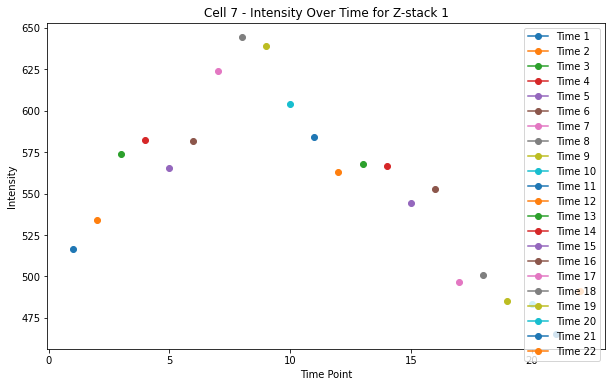

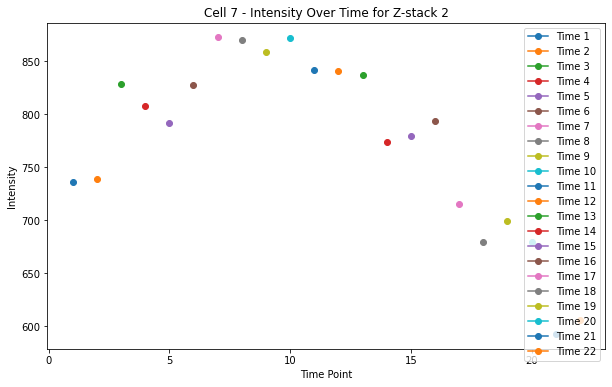

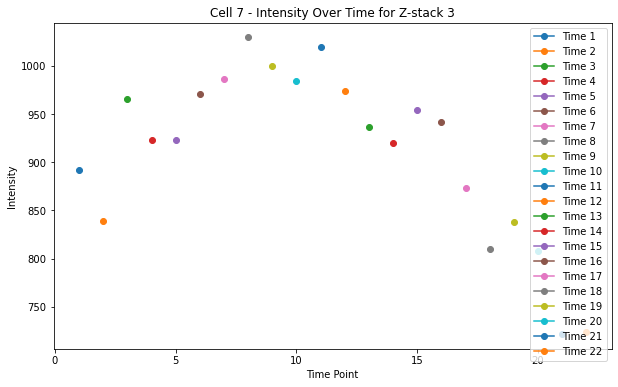

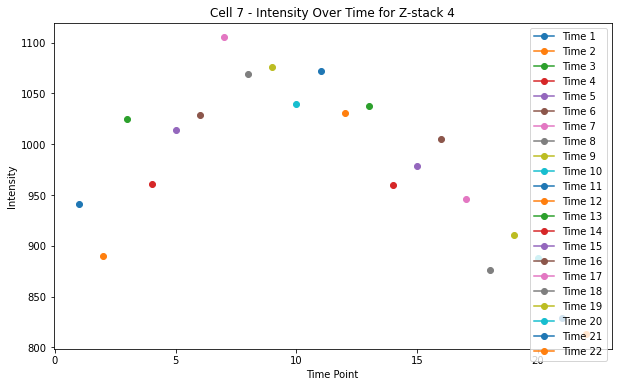

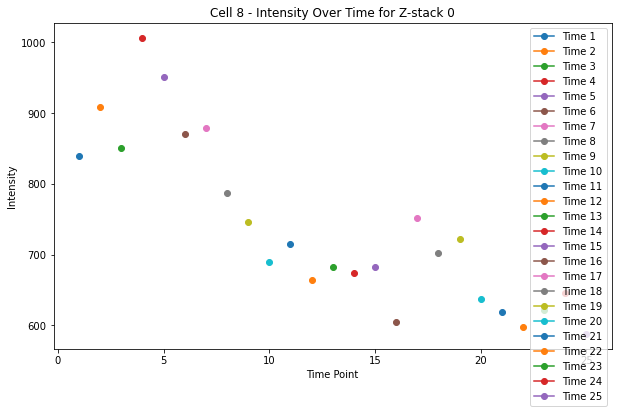

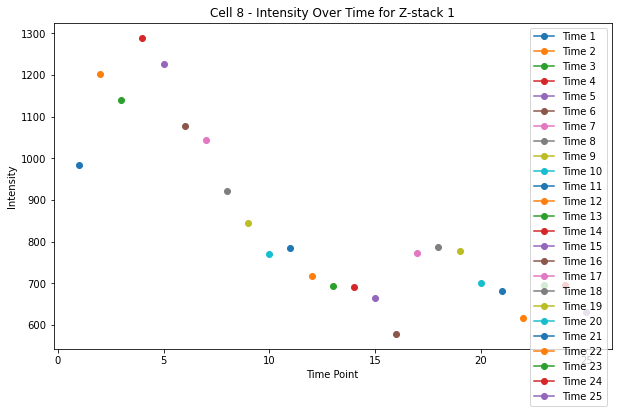

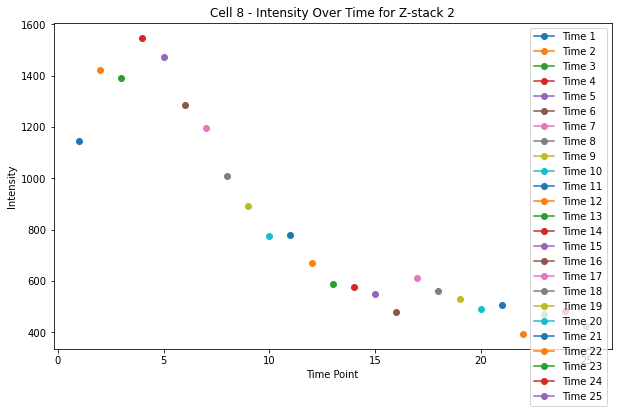

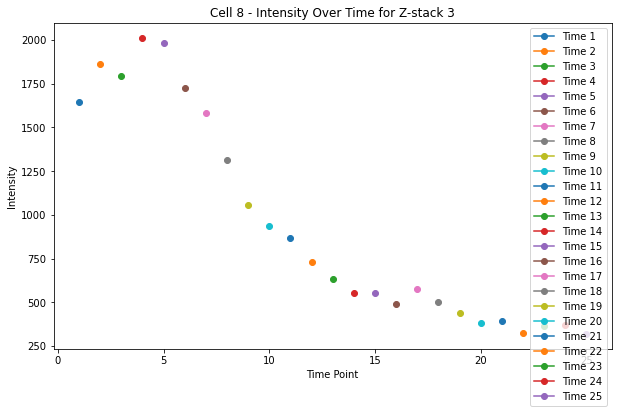

In [3]:
# Load the data
df = pd.read_csv('/Users/ramonrodriguez/Desktop/Stanford/Year_Two/Tang_Lab/Vesicle_Patching/Full-Data_Laser_Ablation/Full_Data_Laser_Ablation_Analysis.csv')

# Get unique cell numbers
unique_cells = df['Cell'].unique()

# Sort the unique_cells if necessary, to ensure analyses follow a logical order
unique_cells.sort()

# Create a plot for each cell
for cell in unique_cells:
    # Filter the DataFrame for the current cell
    cell_df = df[df['Cell'] == cell]
    
    # Get unique Z-stack levels for the current cell
    unique_z_stacks = cell_df['Z-stack'].unique()
    
    # Sort the unique_z_stacks if necessary, to ensure plots follow a logical order
    unique_z_stacks.sort()
    
    # Create a plot for each Z-stack within the current cell
    for z_stack in unique_z_stacks:
        # Filter the DataFrame for the current Z-stack within the current cell
        filtered_df = cell_df[cell_df['Z-stack'] == z_stack]
        
        # Plotting time points vs intensity for the current Z-stack
        plt.figure(figsize=(10, 6))  # Customize figure size as needed
        for time_point in filtered_df['Time'].unique():
            # Extract intensity values for the current time point and Z-stack
            time_point_data = filtered_df[filtered_df['Time'] == time_point]
            plt.plot(time_point_data['Time'], time_point_data['Intensity'], marker='o', label=f'Time {time_point}')
        
        plt.title(f'Cell {cell} - Intensity Over Time for Z-stack {z_stack}')
        plt.xlabel('Time Point')
        plt.ylabel('Intensity')
        plt.legend()
        plt.show()

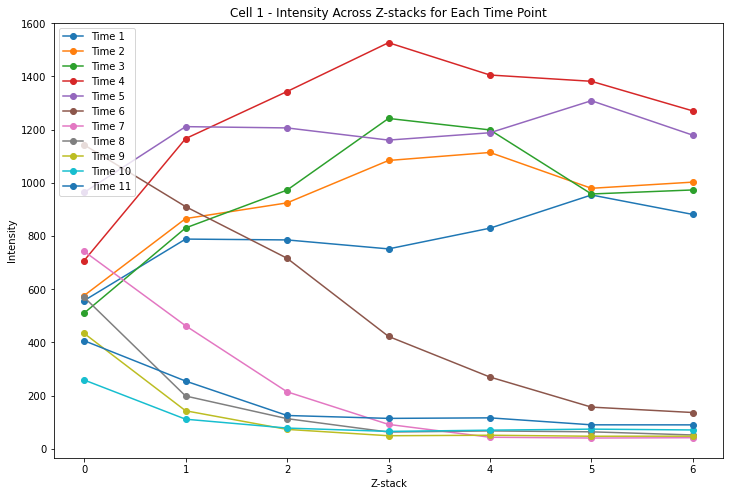

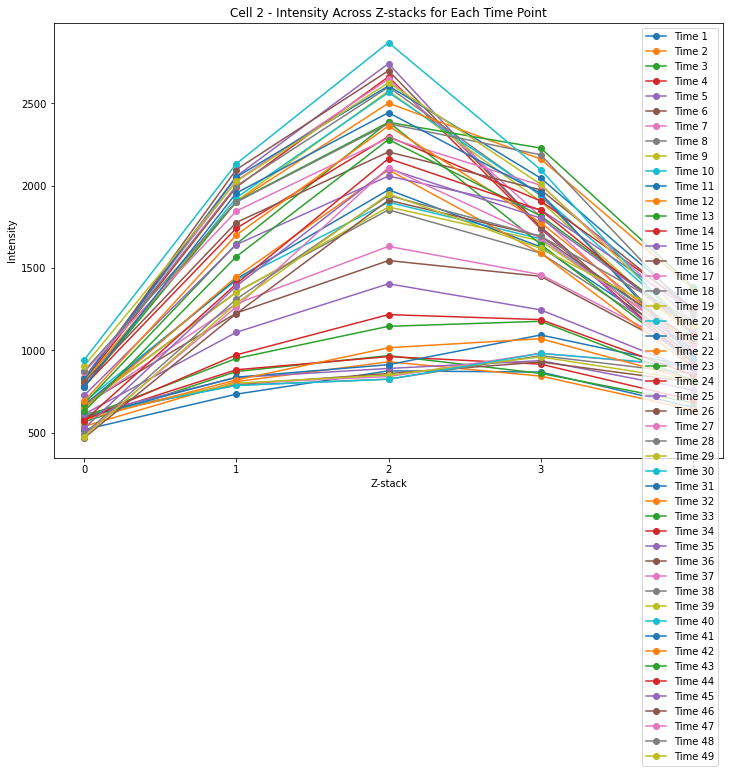

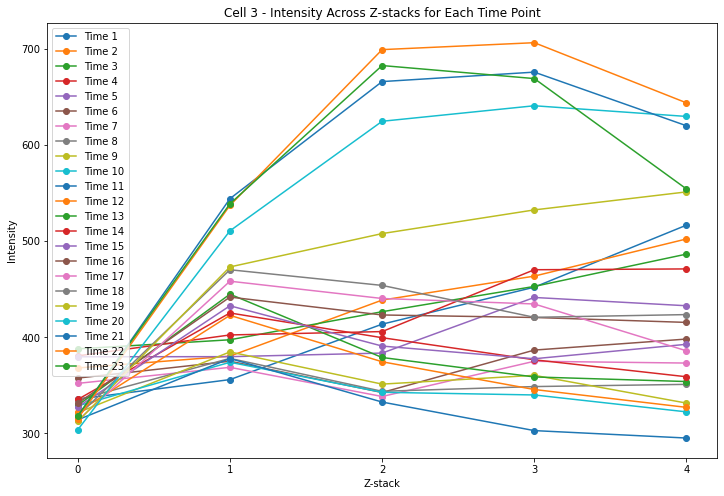

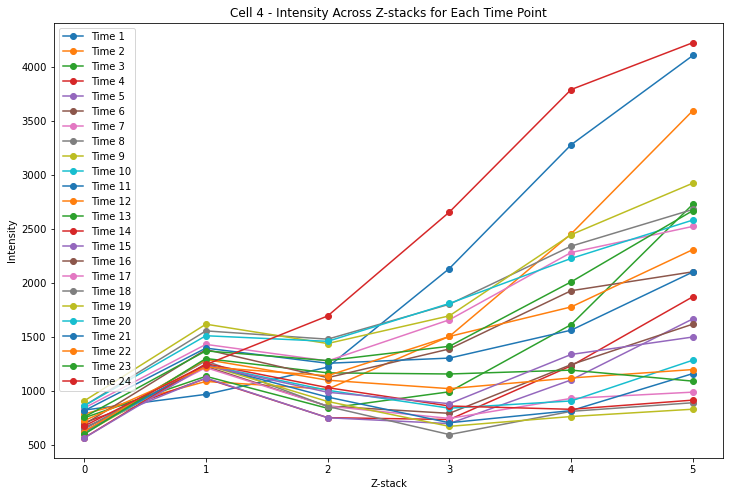

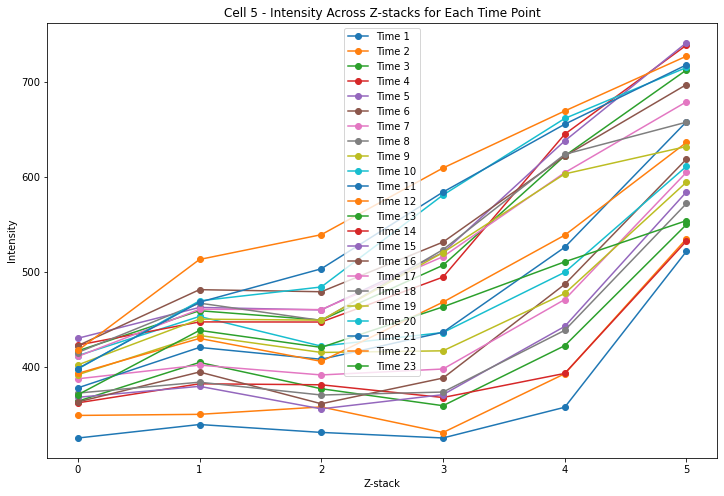

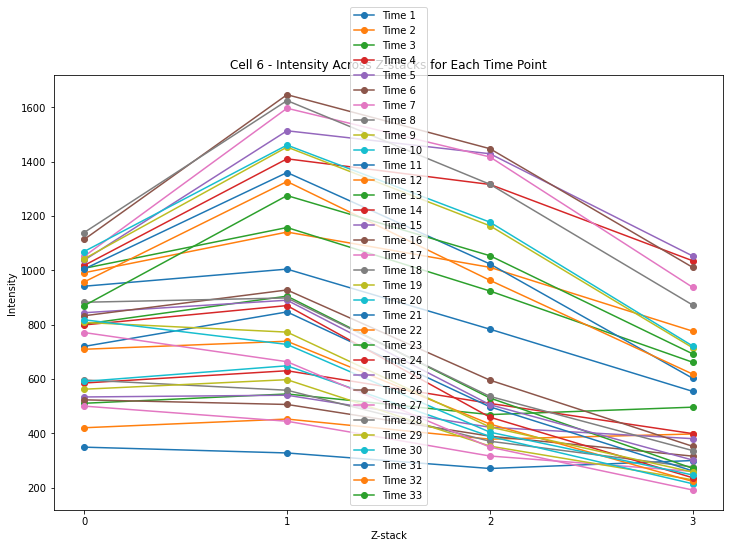

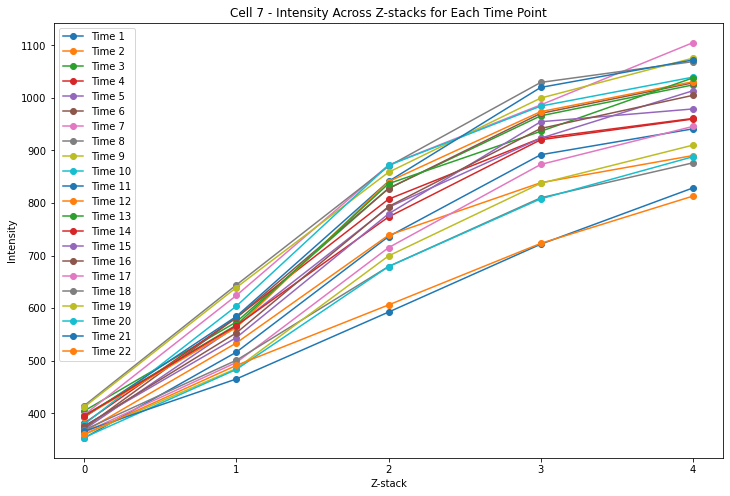

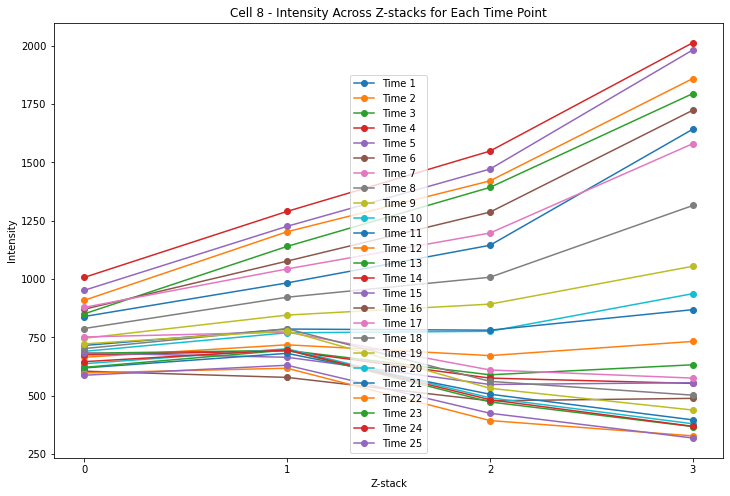

In [4]:
# Load the data
df = pd.read_csv('/Users/ramonrodriguez/Desktop/Stanford/Year_Two/Tang_Lab/Vesicle_Patching/Full-Data_Laser_Ablation/Full_Data_Laser_Ablation_Analysis.csv')

# Get unique cell numbers
unique_cells = df['Cell'].unique()

# Sort the unique_cells if necessary, to ensure analyses follow a logical order
unique_cells.sort()

# Perform the analysis for each cell
for cell in unique_cells:
    # Filter the DataFrame for the current cell
    cell_df = df[df['Cell'] == cell]

    # Get unique time points for the current cell
    unique_time_points = cell_df['Time'].unique()
    unique_time_points.sort()  # Ensure time points are in chronological order for the current cell

    # Get unique Z-stacks for plotting on the x-axis, for the current cell
    unique_z_stacks = cell_df['Z-stack'].unique()
    unique_z_stacks.sort()  # Sorting for logical order on the x-axis for the current cell

    # Prepare the plot for the current cell
    plt.figure(figsize=(12, 8))  # Customize figure size as needed

    # Plot each time point's intensity values across Z-stacks for the current cell
    for time_point in unique_time_points:
        # Filter the DataFrame for the current time point within the current cell
        time_point_data = cell_df[cell_df['Time'] == time_point]
        
        # Ensure the data is sorted by Z-stack to maintain the correct order on the plot
        time_point_data = time_point_data.sort_values('Z-stack')
        
        # Plotting for the current cell
        plt.plot(time_point_data['Z-stack'], time_point_data['Intensity'], '-o', label=f'Time {time_point}')

    plt.title(f'Cell {cell} - Intensity Across Z-stacks for Each Time Point')
    plt.xlabel('Z-stack')
    plt.ylabel('Intensity')
    plt.xticks(unique_z_stacks)  # Ensure all Z-stacks are represented on the x-axis for the current cell
    plt.legend()
    plt.show()

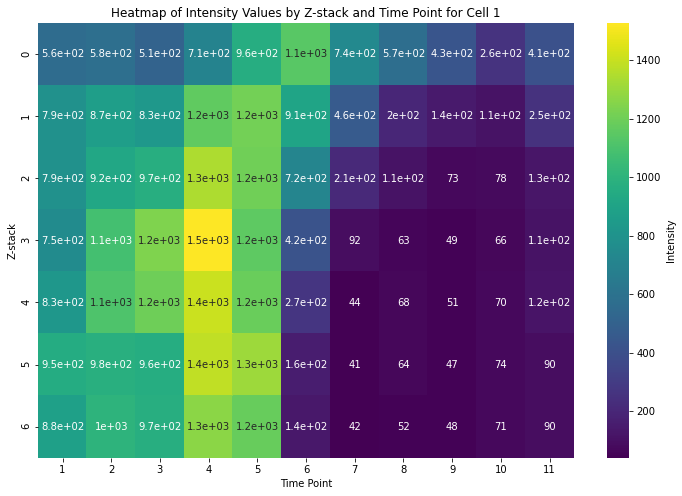

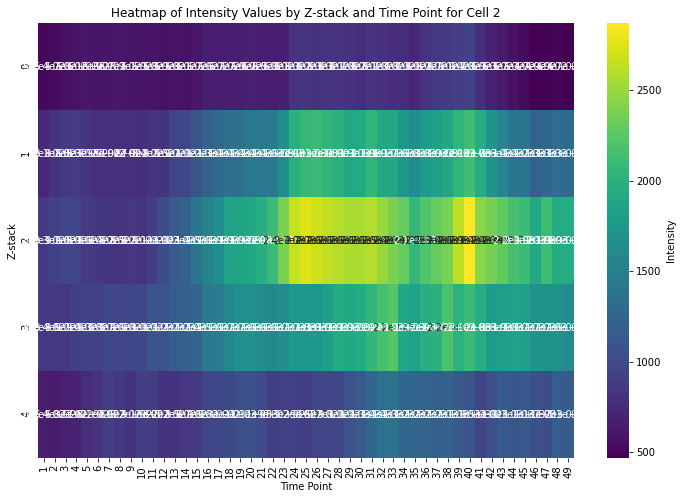

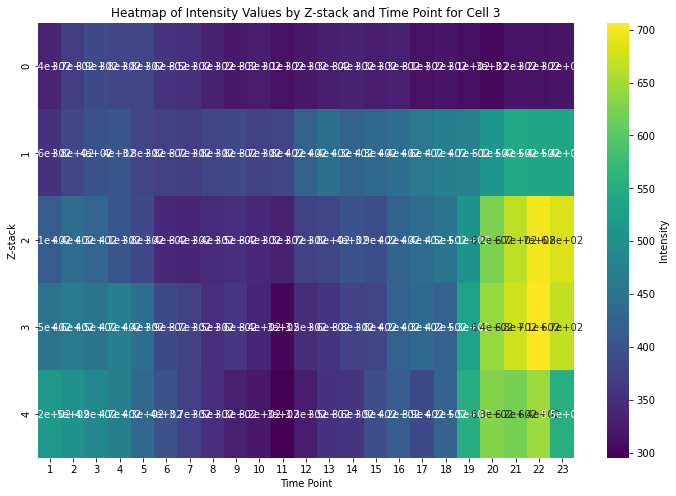

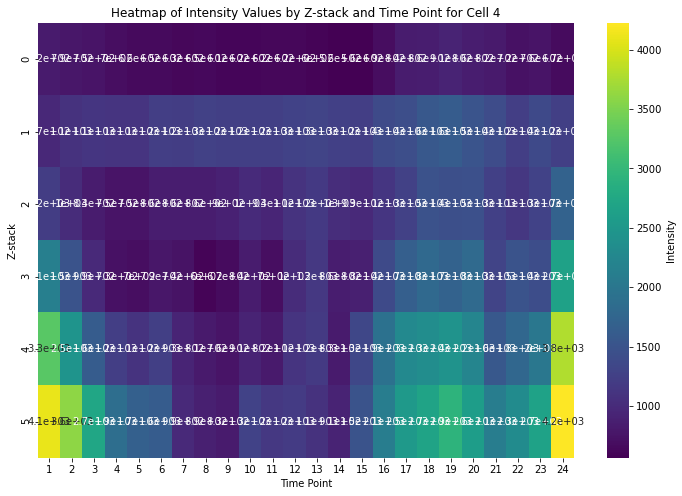

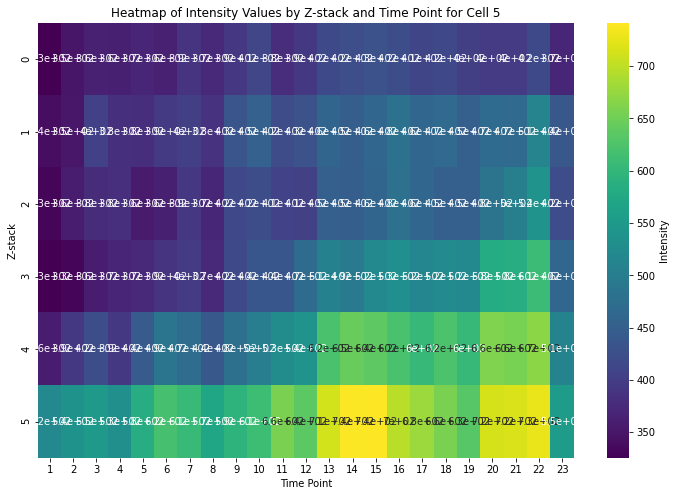

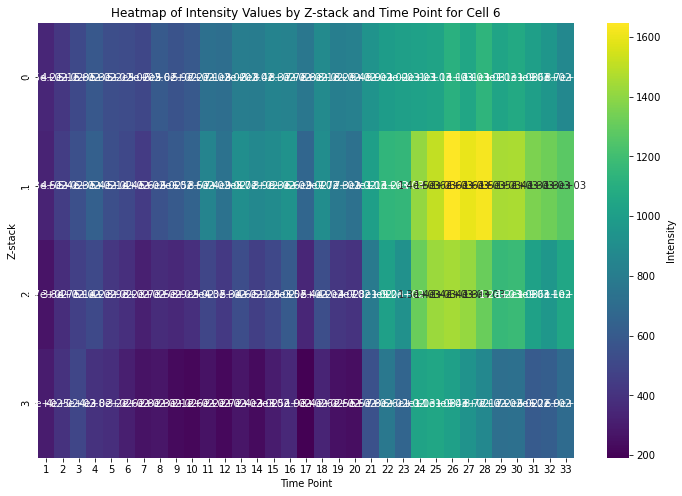

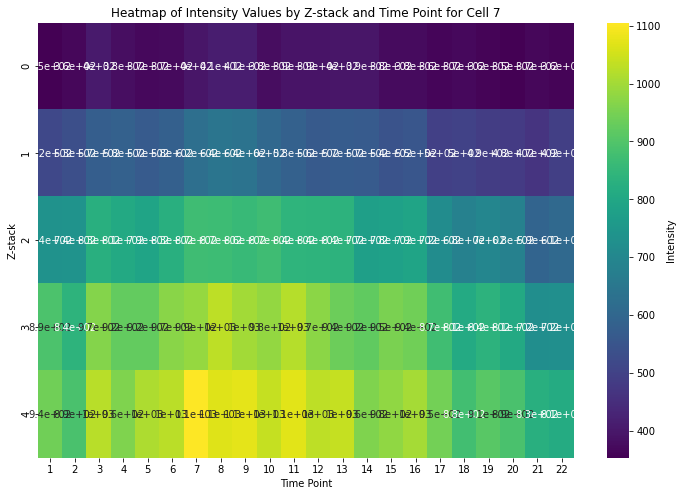

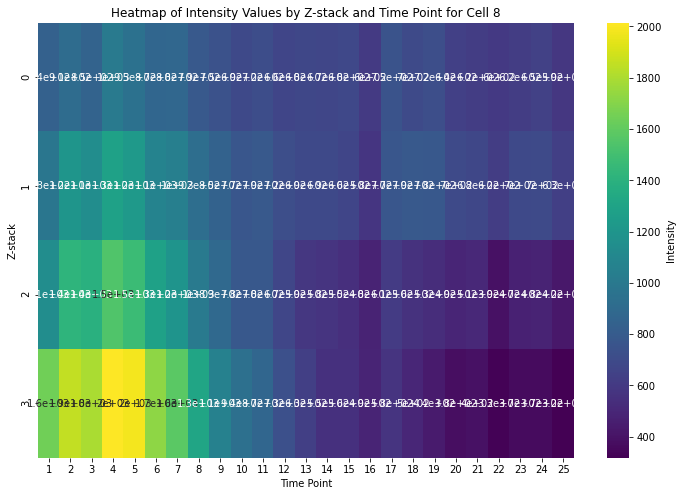

In [5]:
# Load the data
df = pd.read_csv('/Users/ramonrodriguez/Desktop/Stanford/Year_Two/Tang_Lab/Vesicle_Patching/Full-Data_Laser_Ablation/Full_Data_Laser_Ablation_Analysis.csv')

# Get unique cell numbers
unique_cells = df['Cell'].unique()

# Sort the unique_cells if necessary, to ensure analyses follow a logical order
unique_cells.sort()

# Perform the analysis for each cell
for cell in unique_cells:
    # Filter the DataFrame for the current cell
    cell_df = df[df['Cell'] == cell]
    
    # Pivot the DataFrame for the current cell to get the format suitable for a heatmap
    pivot_df = cell_df.pivot_table(index='Z-stack', columns='Time', values='Intensity', aggfunc='mean')
    
    # Using Seaborn to create the heatmap for the current cell
    plt.figure(figsize=(12, 8))  # Customize the figure size as needed
    sns.heatmap(pivot_df, annot=True, cmap='viridis', cbar_kws={'label': 'Intensity'})
    plt.title(f'Heatmap of Intensity Values by Z-stack and Time Point for Cell {cell}')
    plt.xlabel('Time Point')
    plt.ylabel('Z-stack')
    plt.show()

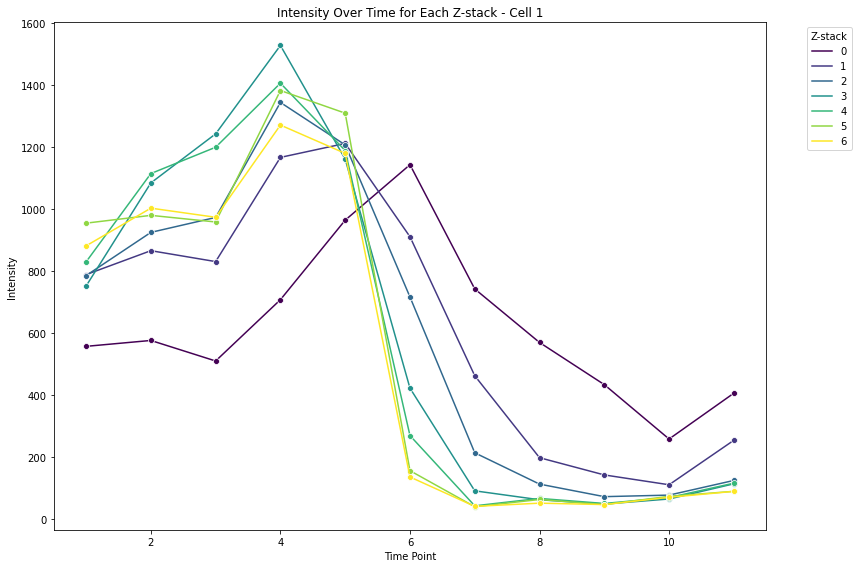

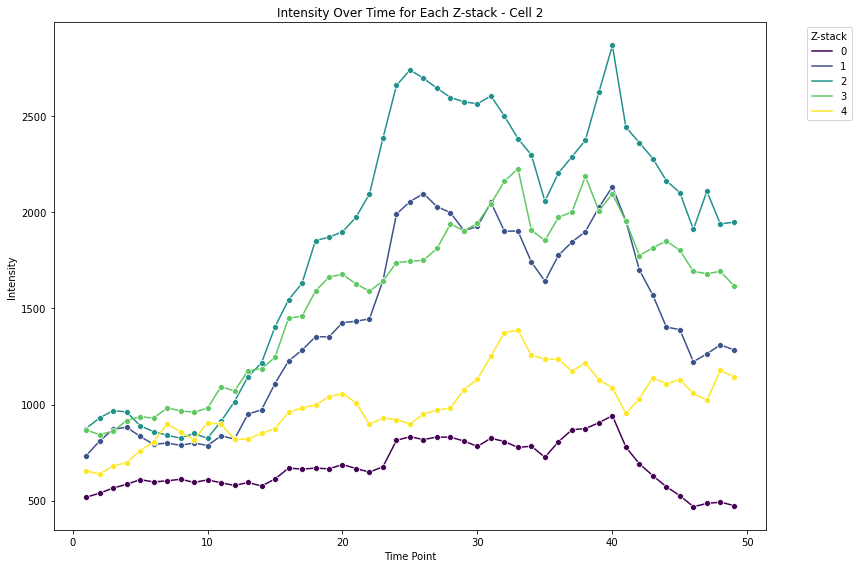

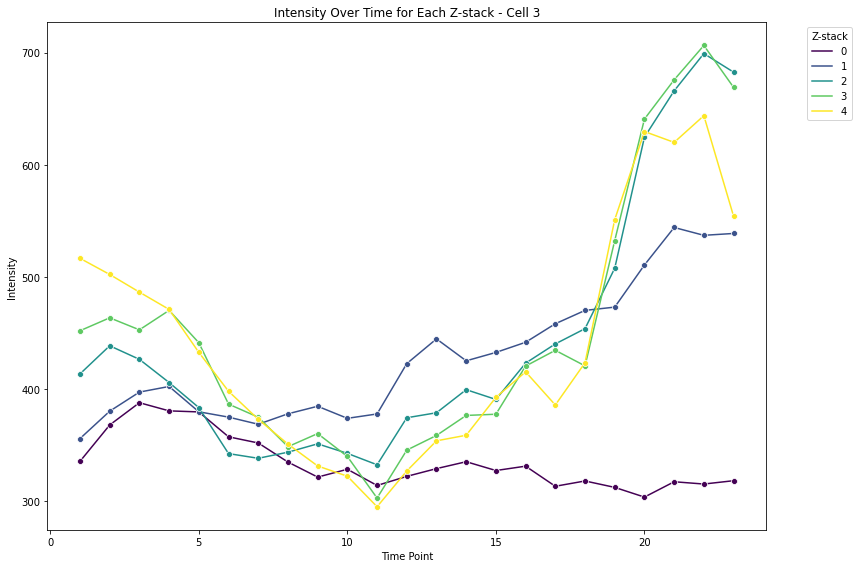

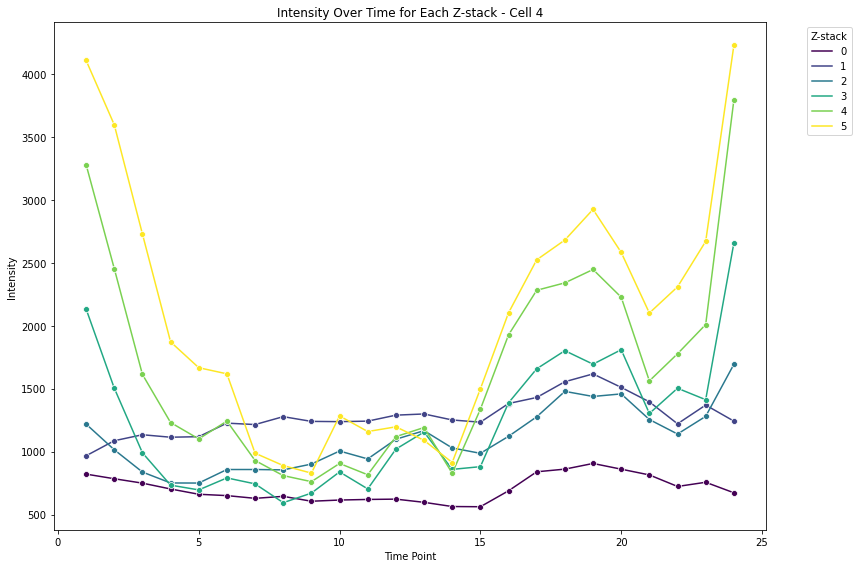

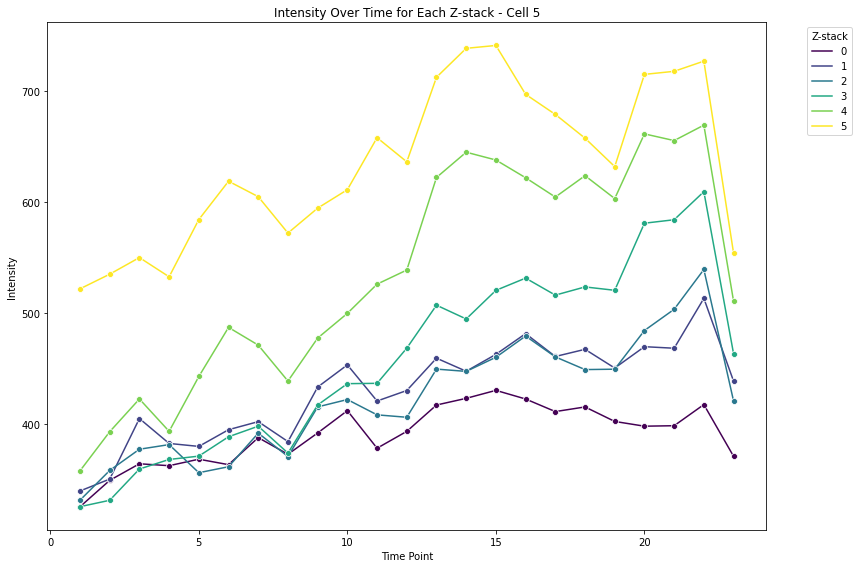

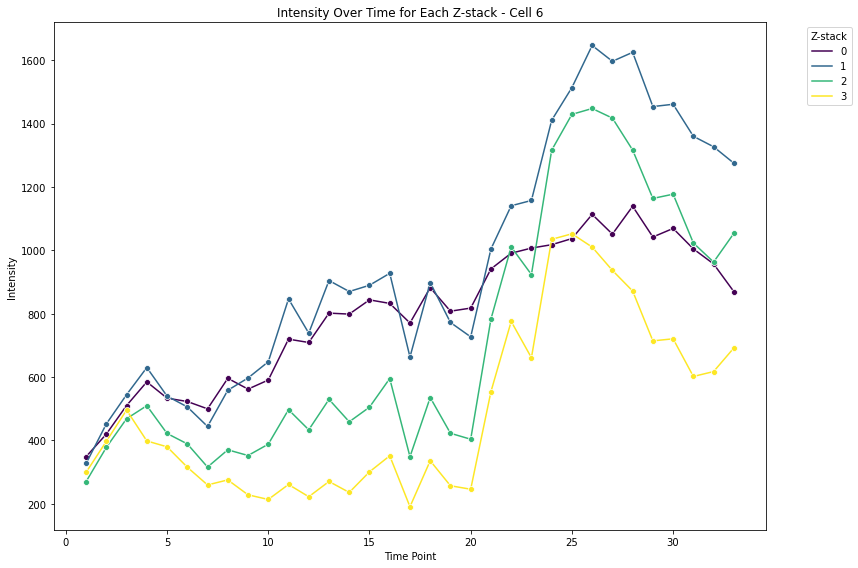

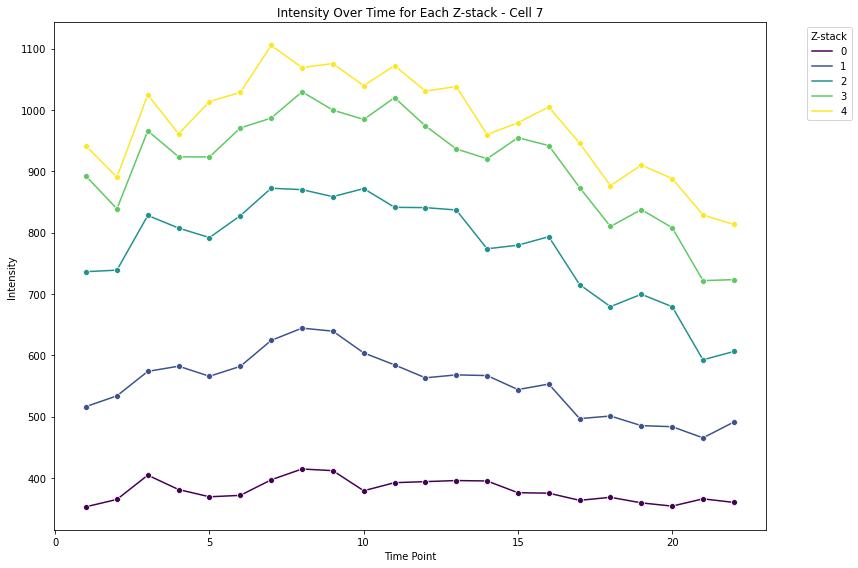

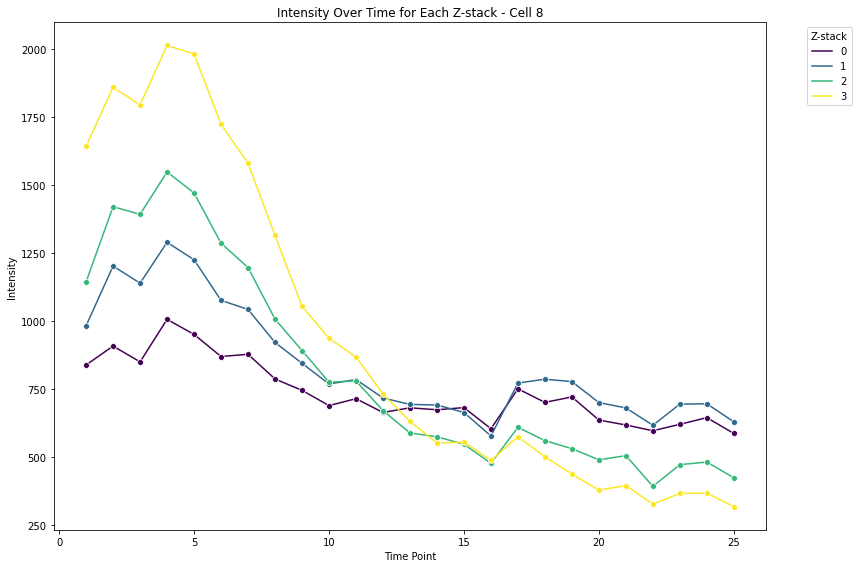

In [6]:
# Load the data
df = pd.read_csv('/Users/ramonrodriguez/Desktop/Stanford/Year_Two/Tang_Lab/Vesicle_Patching/Full-Data_Laser_Ablation/Full_Data_Laser_Ablation_Analysis.csv')

# Get unique cell numbers
unique_cells = df['Cell'].unique()

# Sort the unique_cells if necessary, to ensure analyses follow a logical order
unique_cells.sort()

# Perform the analysis for each cell
for cell in unique_cells:
    # Filter the DataFrame for the current cell
    cell_df = df[df['Cell'] == cell]
    
    # Create the line plot for the current cell
    plt.figure(figsize=(12, 8))  # Customize the figure size as needed
    sns.lineplot(data=cell_df, x='Time', y='Intensity', hue='Z-stack', marker='o', palette='viridis', legend='full')

    plt.title(f'Intensity Over Time for Each Z-stack - Cell {cell}')
    plt.xlabel('Time Point')
    plt.ylabel('Intensity')
    plt.legend(title='Z-stack', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()  # Adjust the layout to make room for the legend

    plt.show()

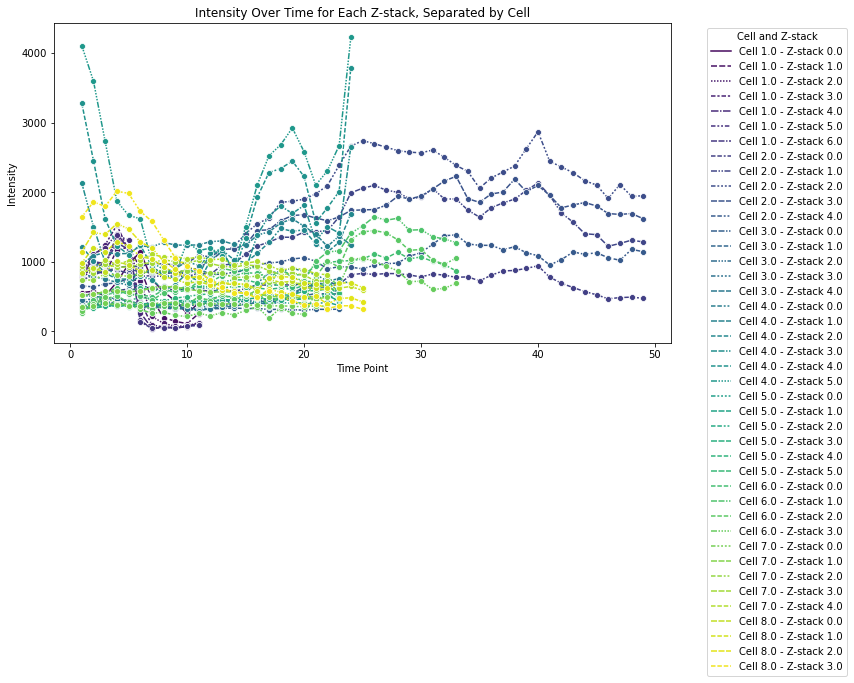

In [7]:

# Create a new column that combines 'Cell' and 'Z-stack' for unique legend entries
df['Cell_Z-stack'] = df.apply(lambda x: f"Cell {x['Cell']} - Z-stack {x['Z-stack']}", axis=1)

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time', y='Intensity', hue='Cell_Z-stack', style='Cell_Z-stack', 
             palette='viridis', marker='o', legend='full')

plt.title('Intensity Over Time for Each Z-stack, Separated by Cell')
plt.xlabel('Time Point')
plt.ylabel('Intensity')
plt.legend(title='Cell and Z-stack', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

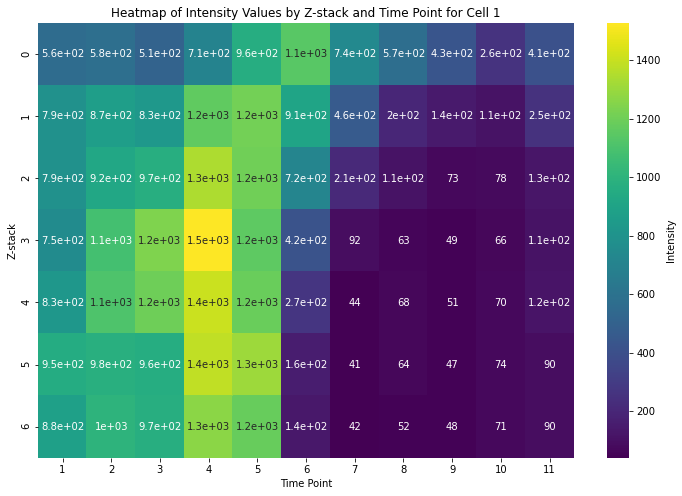

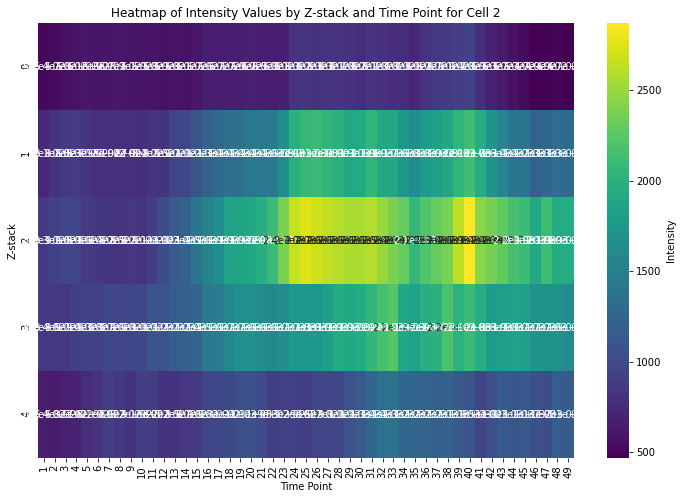

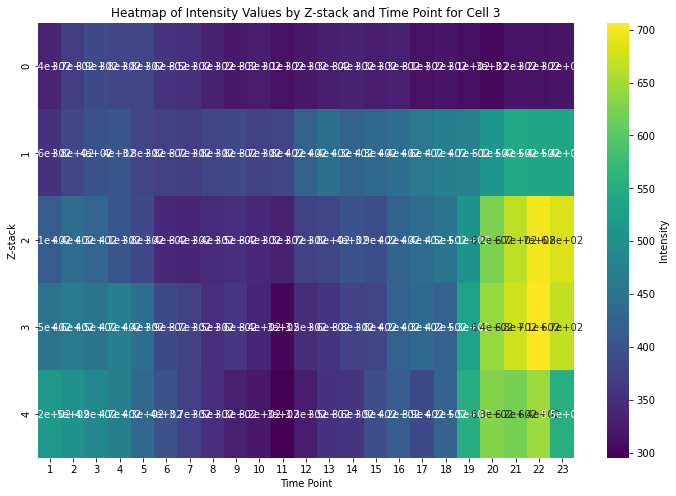

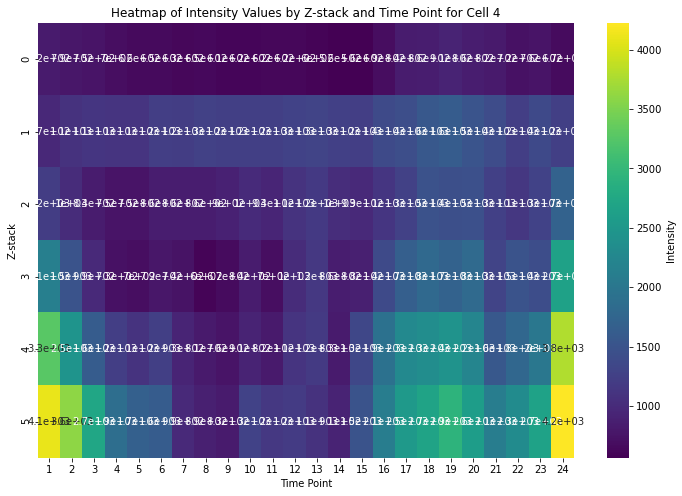

In [11]:
# Load the data
df = pd.read_csv('/Users/ramonrodriguez/Desktop/Stanford/Year_Two/Tang_Lab/Vesicle_Patching/Full-Data_Laser_Ablation/Full_Data_Laser_Ablation_Analysis.csv')

# Get unique cell numbers
unique_cells = df['Cell'].unique()

# Sort the unique_cells if necessary, to ensure analyses follow a logical order
unique_cells.sort()

# Perform the analysis for each cell
for cell in unique_cells:
    # Filter the DataFrame for the current cell
    cell_df = df[df['Cell'] == cell]
    
    # Pivot the DataFrame for the current cell to get the format suitable for a heatmap
    pivot_df = cell_df.pivot_table(index='Z-stack', columns='Time', values='Intensity', aggfunc='mean')
    
    # Using Seaborn to create the heatmap for the current cell
    plt.figure(figsize=(12, 8))  # Customize the figure size as needed
    sns.heatmap(pivot_df, annot=True, cmap='viridis', cbar_kws={'label': 'Intensity'})
    plt.title(f'Heatmap of Intensity Values by Z-stack and Time Point for Cell {cell}')
    plt.xlabel('Time Point')
    plt.ylabel('Z-stack')
    plt.show()

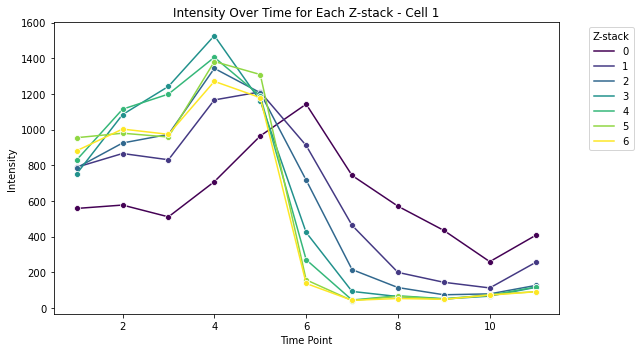

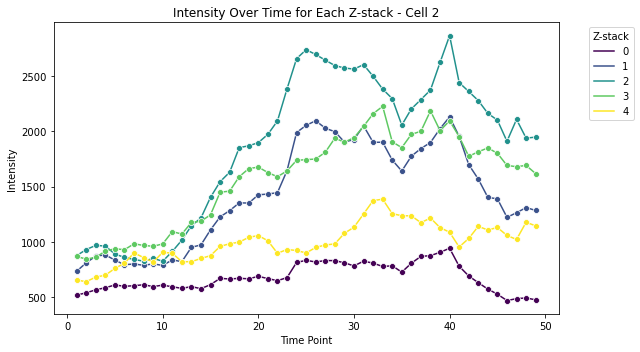

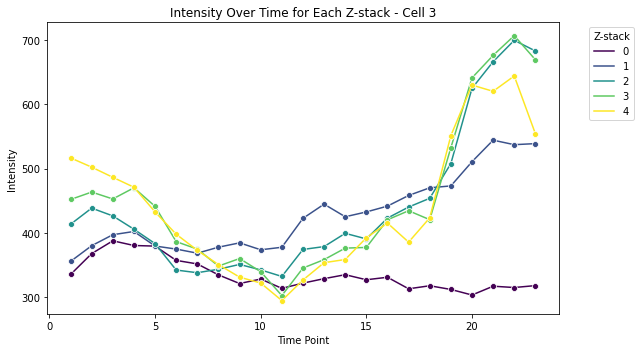

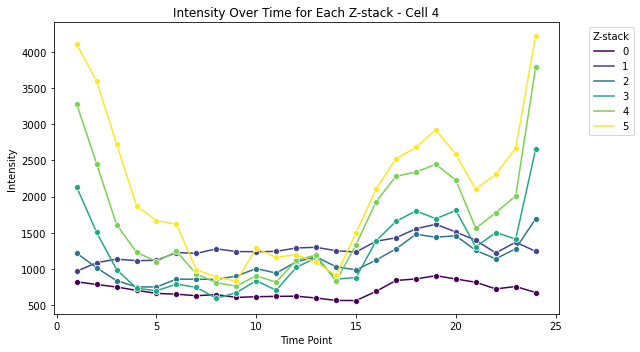

In [15]:
# Load the data
df = pd.read_csv('/Users/ramonrodriguez/Desktop/Stanford/Year_Two/Tang_Lab/Vesicle_Patching/Full-Data_Laser_Ablation/Full_Data_Laser_Ablation_Analysis.csv')

# Get unique cell numbers
unique_cells = df['Cell'].unique()

# Sort the unique_cells if necessary, to ensure analyses follow a logical order
unique_cells.sort()

# Perform the analysis for each cell
for cell in unique_cells:
    # Filter the DataFrame for the current cell
    cell_df = df[df['Cell'] == cell]
    
    # Create the line plot for the current cell
    plt.figure(figsize=(9, 5))  # Customize the figure size as needed
    sns.lineplot(data=cell_df, x='Time', y='Intensity', hue='Z-stack', marker='o', palette='viridis', legend='full')

    plt.title(f'Intensity Over Time for Each Z-stack - Cell {cell}')
    plt.xlabel('Time Point')
    plt.ylabel('Intensity')
    plt.legend(title='Z-stack', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()  # Adjust the layout to make room for the legend

    plt.show()

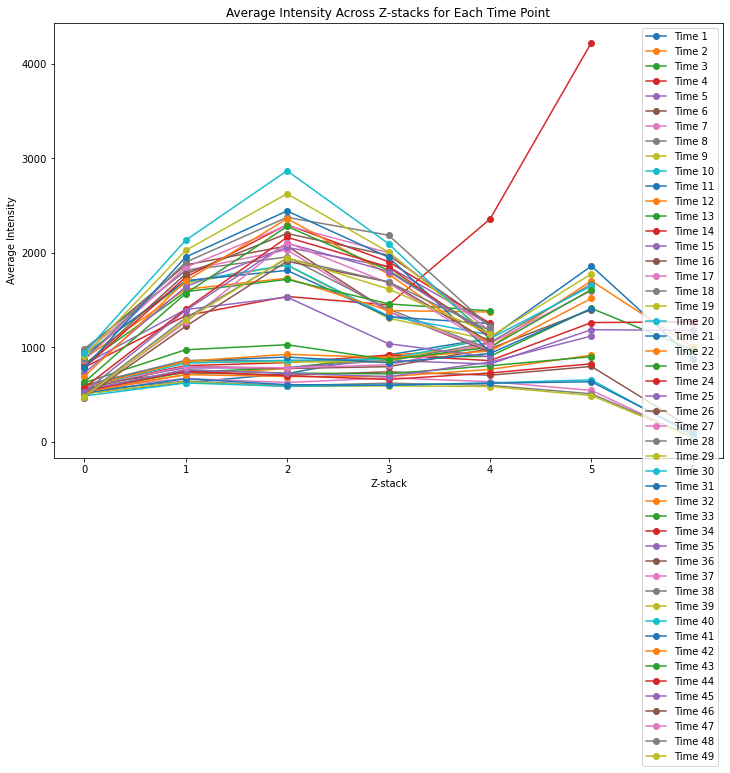

In [6]:
# Group by Z-stack and Time, then calculate the mean intensity for each group
avg_intensity = df.groupby(['Z-stack', 'Time'])['Intensity'].mean().reset_index()

# Pivot the data to have Z-stacks on rows, Time points on columns, and average intensities as values
pivot_table = avg_intensity.pivot(index='Z-stack', columns='Time', values='Intensity')

# Plotting
plt.figure(figsize=(12, 8))
for time_point in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[time_point], '-o', label=f'Time {time_point}')

plt.title('Average Intensity Across Z-stacks for Each Time Point')
plt.xlabel('Z-stack')
plt.ylabel('Average Intensity')
plt.legend()
plt.show()

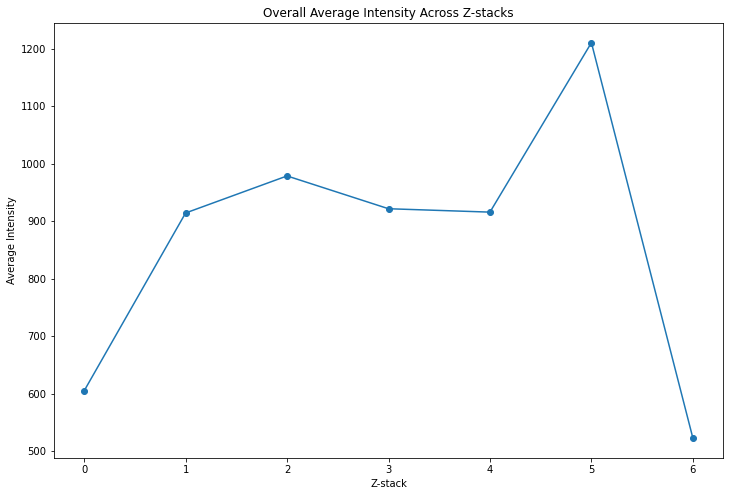

In [7]:
# Group by Z-stack and then calculate the mean intensity for each Z-stack across all time points and cells
overall_avg_intensity = df.groupby('Z-stack')['Intensity'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(overall_avg_intensity['Z-stack'], overall_avg_intensity['Intensity'], '-o')

plt.title('Overall Average Intensity Across Z-stacks')
plt.xlabel('Z-stack')
plt.ylabel('Average Intensity')
plt.xticks(overall_avg_intensity['Z-stack'])  # Ensure all Z-stacks are represented on the x-axis
plt.show()

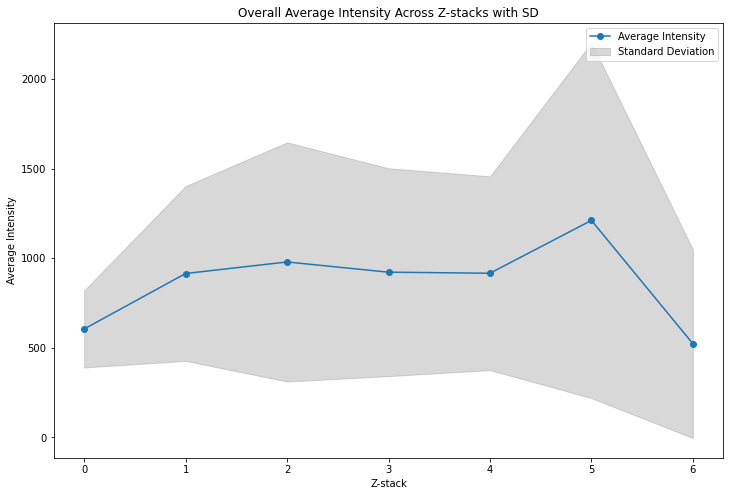

In [8]:
# Group by Z-stack, then calculate the mean and standard deviation for each Z-stack across all time points and cells
stats_df = df.groupby('Z-stack')['Intensity'].agg(['mean', 'std']).reset_index()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(stats_df['Z-stack'], stats_df['mean'], '-o', label='Average Intensity')

# Adding a shaded region for the standard deviation
plt.fill_between(stats_df['Z-stack'], stats_df['mean'] - stats_df['std'], stats_df['mean'] + stats_df['std'], color='gray', alpha=0.3, label='Standard Deviation')

plt.title('Overall Average Intensity Across Z-stacks with SD')
plt.xlabel('Z-stack')
plt.ylabel('Average Intensity')
plt.xticks(stats_df['Z-stack'])  # Ensure all Z-stacks are represented on the x-axis
plt.legend()
plt.show()

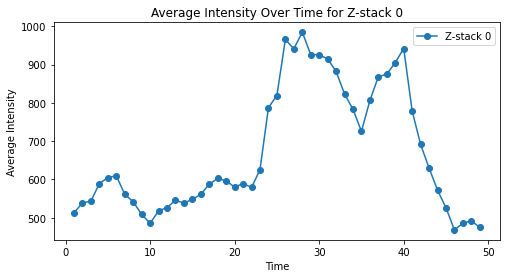

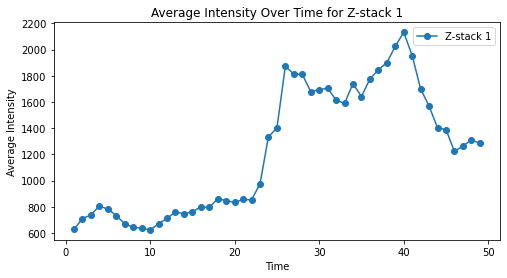

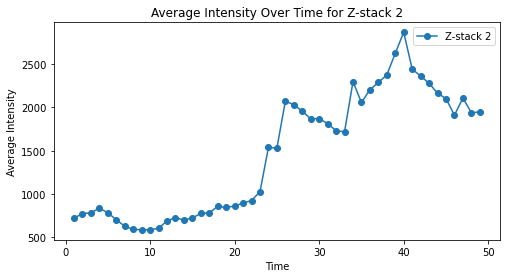

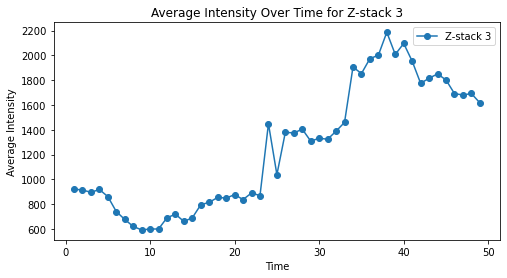

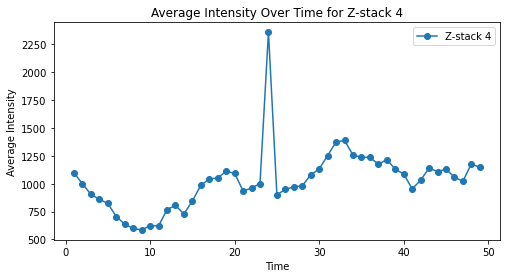

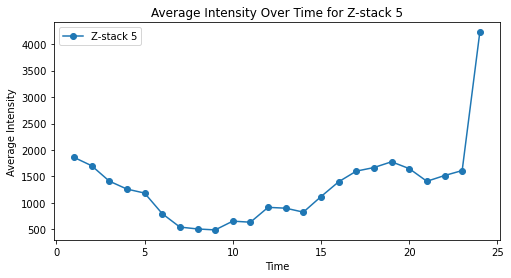

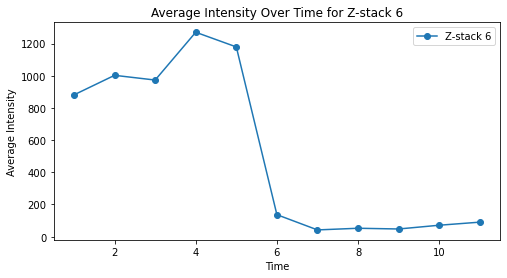

In [10]:

# Get unique Z-stacks
unique_z_stacks = df['Z-stack'].unique()
unique_z_stacks.sort()

# Iterate through each Z-stack and plot the data
for z_stack in unique_z_stacks:
    # Filter the DataFrame for the current Z-stack
    z_stack_df = df[df['Z-stack'] == z_stack]
    
    # Group by Time and calculate the mean intensity for each group
    time_avg_intensity = z_stack_df.groupby('Time')['Intensity'].mean().reset_index()
    
    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(time_avg_intensity['Time'], time_avg_intensity['Intensity'], '-o', label=f'Z-stack {z_stack}')
    
    plt.title(f'Average Intensity Over Time for Z-stack {z_stack}')
    plt.xlabel('Time')
    plt.ylabel('Average Intensity')
    plt.legend()
    plt.show()

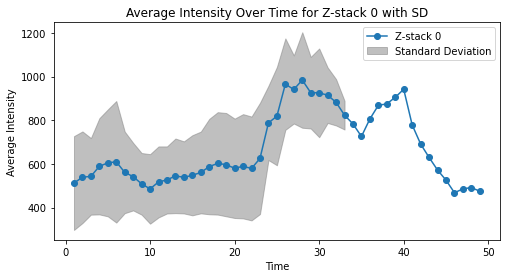

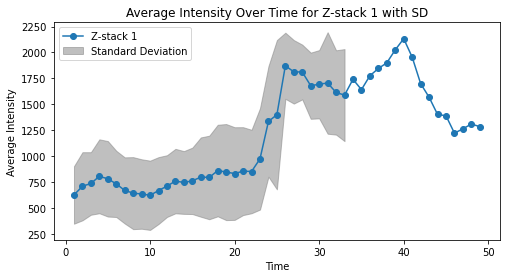

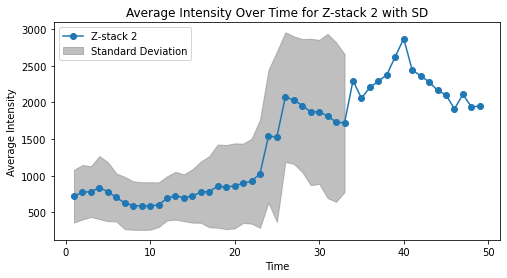

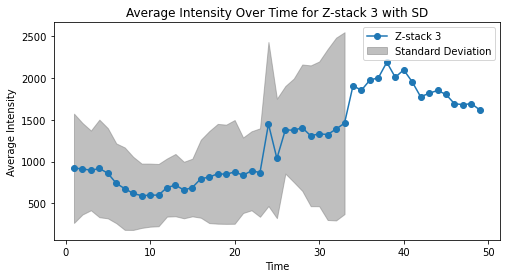

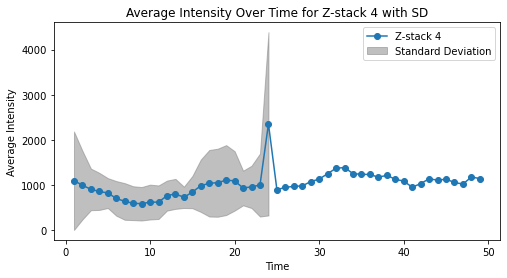

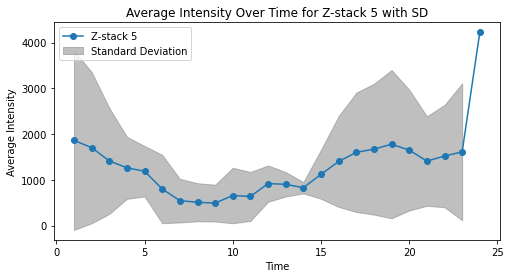

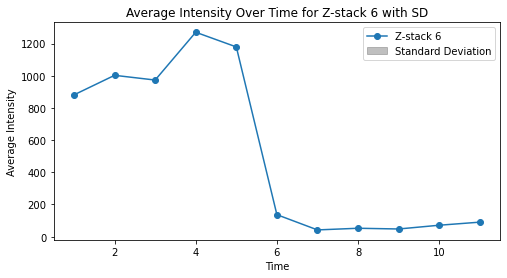

In [11]:
# Get unique Z-stacks
unique_z_stacks = df['Z-stack'].unique()
unique_z_stacks.sort()

# Iterate through each Z-stack and plot the data with SD shading
for z_stack in unique_z_stacks:
    # Filter the DataFrame for the current Z-stack
    z_stack_df = df[df['Z-stack'] == z_stack]
    
    # Group by Time, calculate the mean and standard deviation for each group
    stats_df = z_stack_df.groupby('Time')['Intensity'].agg(['mean', 'std']).reset_index()
    
    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(stats_df['Time'], stats_df['mean'], '-o', label=f'Z-stack {z_stack}')
    
    # Adding a shaded region for the standard deviation
    plt.fill_between(stats_df['Time'], stats_df['mean'] - stats_df['std'], stats_df['mean'] + stats_df['std'], color='gray', alpha=0.5, label='Standard Deviation')
    
    plt.title(f'Average Intensity Over Time for Z-stack {z_stack} with SD')
    plt.xlabel('Time')
    plt.ylabel('Average Intensity')
    plt.legend()
    plt.show()

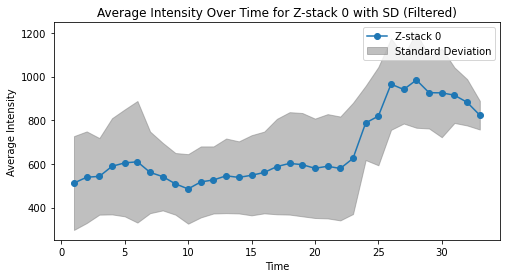

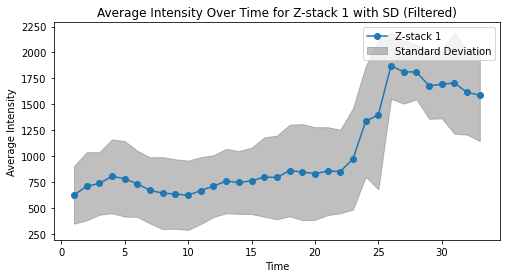

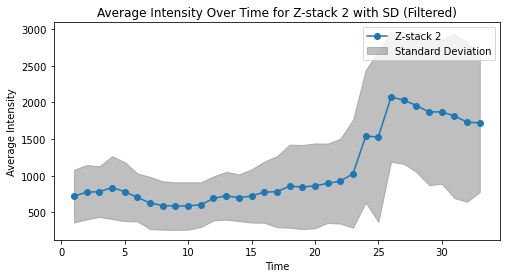

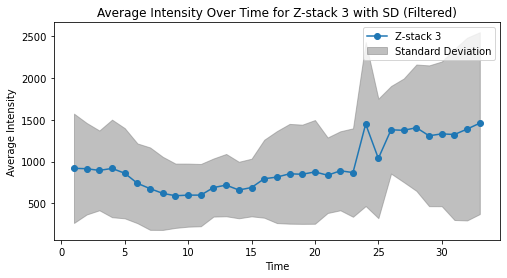

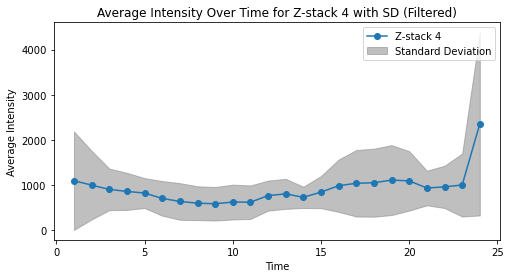

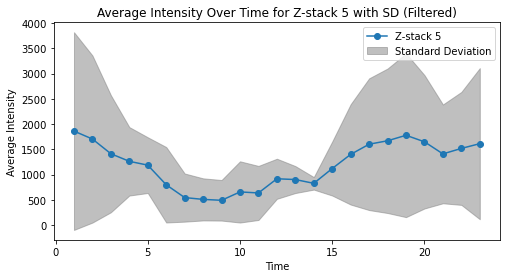

In [10]:
# Get unique Z-stacks
unique_z_stacks = df['Z-stack'].unique()
unique_z_stacks.sort()

# Iterate through each Z-stack
for z_stack in unique_z_stacks:
    # Filter the DataFrame for the current Z-stack
    z_stack_df = df[df['Z-stack'] == z_stack]
    
    # Group by Time, then calculate count, mean, and standard deviation for each group
    stats_df = z_stack_df.groupby('Time')['Intensity'].agg(count='size', mean='mean', std='std').reset_index()
    
    # Filter out time points with only one observation
    valid_stats_df = stats_df[stats_df['count'] > 1]
    
    if not valid_stats_df.empty:
        # Plotting
        plt.figure(figsize=(8, 4))
        plt.plot(valid_stats_df['Time'], valid_stats_df['mean'], '-o', label=f'Z-stack {z_stack}')
        
        # Adding a shaded region for the standard deviation, considering only time points with more than one observation
        plt.fill_between(valid_stats_df['Time'], valid_stats_df['mean'] - valid_stats_df['std'], valid_stats_df['mean'] + valid_stats_df['std'], color='gray', alpha=0.5, label='Standard Deviation')
        
        plt.title(f'Average Intensity Over Time for Z-stack {z_stack} with SD (Filtered)')
        plt.xlabel('Time')
        plt.ylabel('Average Intensity')
        plt.legend()
        plt.show()

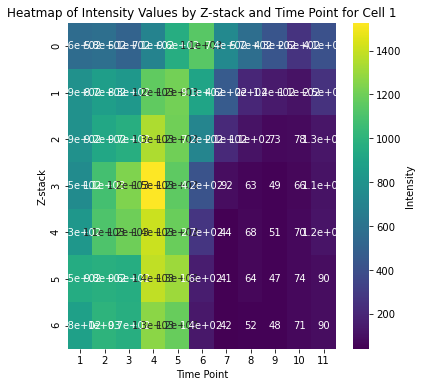

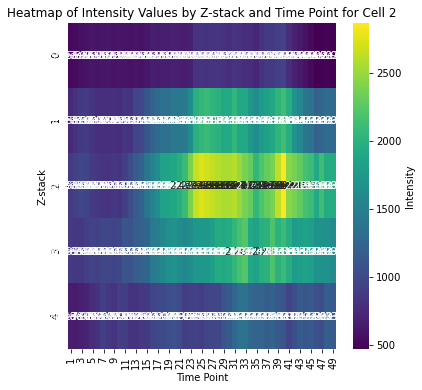

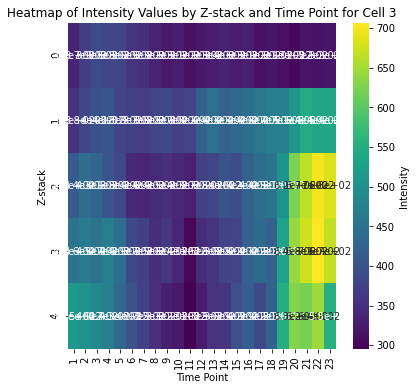

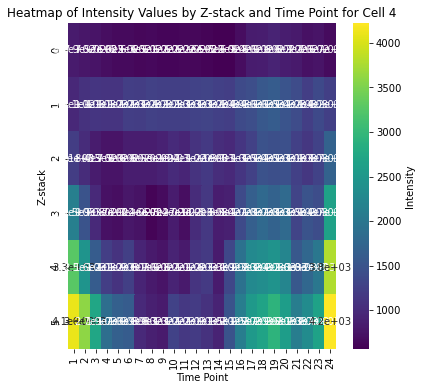

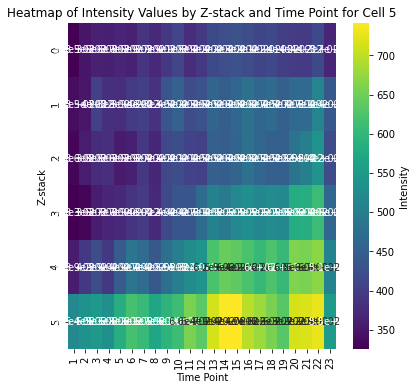

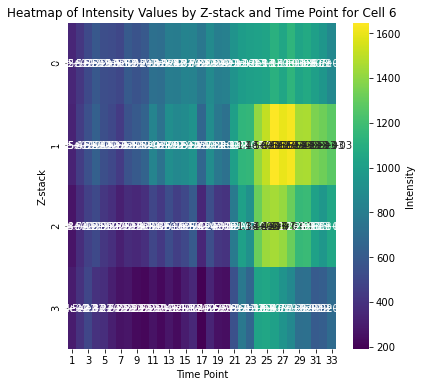

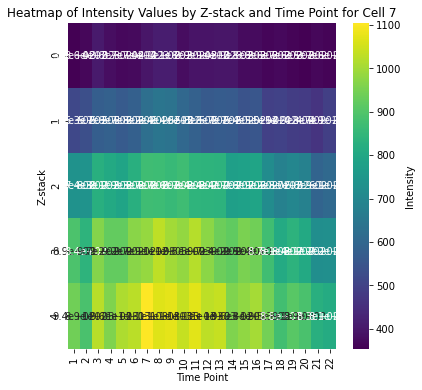

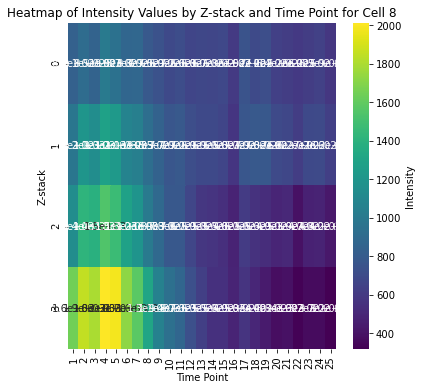

In [9]:
# Load the data
df = pd.read_csv('/Users/ramonrodriguez/Desktop/Stanford/Year_Two/Tang_Lab/Vesicle_Patching/Full-Data_Laser_Ablation/Full_Data_Laser_Ablation_Analysis.csv')

# Get unique cell numbers
unique_cells = df['Cell'].unique()

# Sort the unique_cells if necessary, to ensure analyses follow a logical order
unique_cells.sort()

# Perform the analysis for each cell
for cell in unique_cells:
    # Filter the DataFrame for the current cell
    cell_df = df[df['Cell'] == cell]
    
    # Pivot the DataFrame for the current cell to get the format suitable for a heatmap
    pivot_df = cell_df.pivot_table(index='Z-stack', columns='Time', values='Intensity', aggfunc='mean')
    
    # Using Seaborn to create the heatmap for the current cell
    plt.figure(figsize=(6, 6))  # Customize the figure size as needed
    sns.heatmap(pivot_df, annot=True, cmap='viridis', cbar_kws={'label': 'Intensity'})
    plt.title(f'Heatmap of Intensity Values by Z-stack and Time Point for Cell {cell}')
    plt.xlabel('Time Point')
    plt.ylabel('Z-stack')
    plt.show()

In [ ]:
 # Get current x-axis tick locations and labels, and set new labels with these values multiplied by 10
    locs, labels = plt.xticks()  # Get current ticks
    plt.xticks(locs, [int(x) * 10 for x in locs])  # Set new labels, multiplied by 10
    

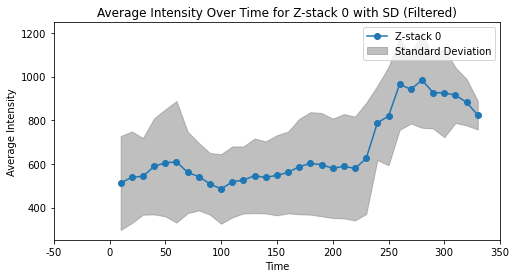

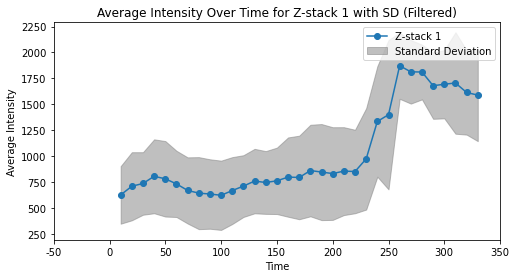

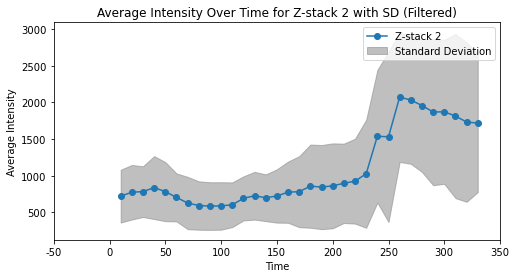

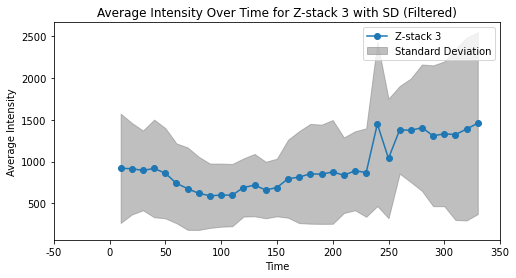

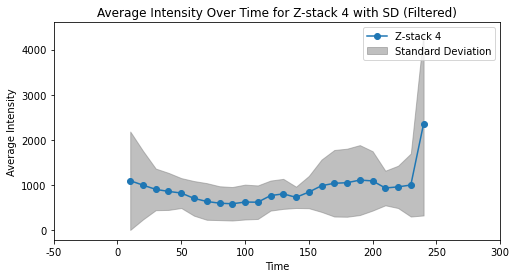

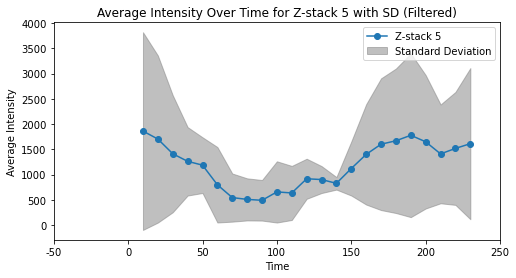

In [11]:
# Get unique Z-stacks
unique_z_stacks = df['Z-stack'].unique()
unique_z_stacks.sort()

# Iterate through each Z-stack
for z_stack in unique_z_stacks:
    # Filter the DataFrame for the current Z-stack
    z_stack_df = df[df['Z-stack'] == z_stack]
    
    # Group by Time, then calculate count, mean, and standard deviation for each group
    stats_df = z_stack_df.groupby('Time')['Intensity'].agg(count='size', mean='mean', std='std').reset_index()
    
    # Filter out time points with only one observation
    valid_stats_df = stats_df[stats_df['count'] > 1]
    
    if not valid_stats_df.empty:
        # Plotting
        plt.figure(figsize=(8, 4))
        plt.plot(valid_stats_df['Time'], valid_stats_df['mean'], '-o', label=f'Z-stack {z_stack}')
        
        # Adding a shaded region for the standard deviation, considering only time points with more than one observation
        plt.fill_between(valid_stats_df['Time'], valid_stats_df['mean'] - valid_stats_df['std'], valid_stats_df['mean'] + valid_stats_df['std'], color='gray', alpha=0.5, label='Standard Deviation')
        
         # Get current x-axis tick locations and labels, and set new labels with these values multiplied by 10
        locs, labels = plt.xticks()  # Get current ticks
        plt.xticks(locs, [int(x) * 10 for x in locs])  # Set new labels, multiplied by 10
    
        
        plt.title(f'Average Intensity Over Time for Z-stack {z_stack} with SD (Filtered)')
        plt.xlabel('Time')
        plt.ylabel('Average Intensity')
        plt.legend()
        plt.show()

In [ ]:
# Set the x-axis to start at 0 and let the upper limit be determined automatically
    plt.xlim(left=0)

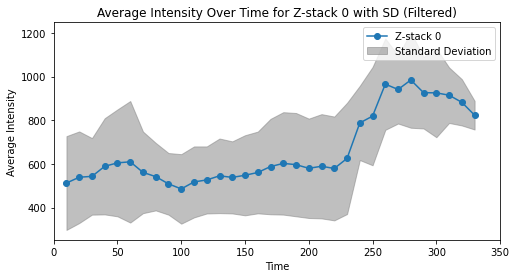

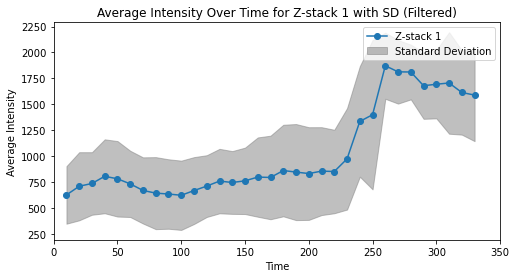

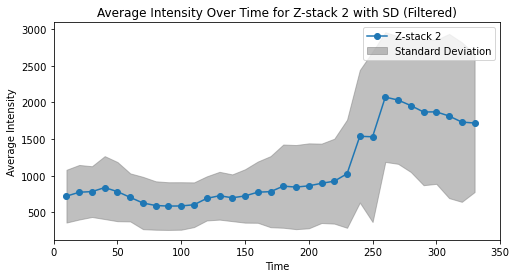

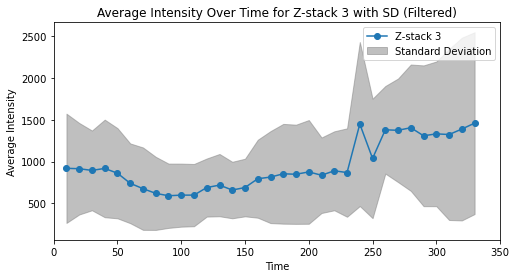

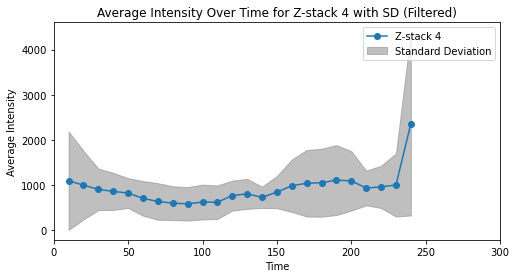

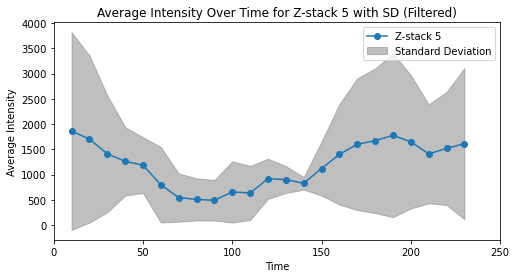

In [14]:
# Get unique Z-stacks
unique_z_stacks = df['Z-stack'].unique()
unique_z_stacks.sort()

# Iterate through each Z-stack
for z_stack in unique_z_stacks:
    # Filter the DataFrame for the current Z-stack
    z_stack_df = df[df['Z-stack'] == z_stack]
    
    # Group by Time, then calculate count, mean, and standard deviation for each group
    stats_df = z_stack_df.groupby('Time')['Intensity'].agg(count='size', mean='mean', std='std').reset_index()
    
    # Filter out time points with only one observation
    valid_stats_df = stats_df[stats_df['count'] > 1]
    
    if not valid_stats_df.empty:
        # Plotting
        plt.figure(figsize=(8, 4))
        plt.plot(valid_stats_df['Time'], valid_stats_df['mean'], '-o', label=f'Z-stack {z_stack}')
        
        # Adding a shaded region for the standard deviation, considering only time points with more than one observation
        plt.fill_between(valid_stats_df['Time'], valid_stats_df['mean'] - valid_stats_df['std'], valid_stats_df['mean'] + valid_stats_df['std'], color='gray', alpha=0.5, label='Standard Deviation')
        
        # Set the x-axis to start at 0 and let the upper limit be determined automatically
        plt.xlim(left=0) 
            
        # Get current x-axis tick locations and labels, and set new labels with these values multiplied by 10
        locs, labels = plt.xticks()  # Get current ticks
        plt.xticks(locs, [int(x) * 10 for x in locs])  # Set new labels, multiplied by 10
    
        
        plt.title(f'Average Intensity Over Time for Z-stack {z_stack} with SD (Filtered)')
        plt.xlabel('Time')
        plt.ylabel('Average Intensity')
        plt.legend()
        plt.show()